# 🏢 **Predict & Simulate: Customer Revenue Uplift for Telco Marketing**

AI-driven modeling and simulation pipeline for customer revenue uplift in telecommunications marketing.

---
## 📋 **Table of Contents**
1. [**Executive Summary & Business Value**]()
2. [**Dataset Overview**]()
3. [**Environment Setup & Configuration**]()
4. [**Data Preparation & Feature Engineering**]()
5. [**Uplift Modeling & Evaluation**]()
6. [**Explainability & Network Analysis**]()
7. [**Interactive Dashboard, Simulation & What-If Scenarios**]()

---

## ⚡ **Quick Start Guide**

```bash
# Clone and setup
git clone https://github.com/cerdasbersamadamelia/Customer-Revenue-Uplift.git
cd Customer-Revenue-Uplift
pip install -r requirements.txt

# Launch notebook
jupyter lab app.ipynb
```
---

## 🚀 Executive Summary

This project delivers a state-of-the-art machine learning solution for telecommunications companies to optimize marketing campaign effectiveness and predict customer revenue uplift. By leveraging advanced T-learner methodologies and network quality analytics, we achieve superior ROI prediction accuracy compared to traditional approaches.

### 🎯 Key Business Value
- **30-40% improvement** in campaign ROI through precise customer targeting and scenario simulation.
- **Advanced uplift modeling** (T-learner) for causal inference and uplift prediction.
- **Simulation & what-if analysis** to compare campaign strategies and estimate business impact.
- **Network quality integration** for deeper customer insights.

### 🏆 Technical Innovation
- Multi-source data integration (customer, usage, campaign, network, complaints).
- Advanced feature engineering and interaction terms.
- SHAP explainability for interpretable AI.
- Interactive Streamlit/Gradio dashboard for business users.

---

## 📋 Project Architecture

### 🔄 ML Pipeline Overview
```
      Data   →   Features    →    Uplift Model    →  Uplift Prediction  →  Simulation    →   Insights  
       ↓            ↓                  ↓                   ↓                   ↓                ↓      
  5 Datasets   50+ Features     Treatment/Control     Uplift Scores       ROI Simulation     Dashboard 
```

### 🎯 Success Metrics
- **Model Performance**: AUC > 0.75 for uplift prediction.
- **Business Impact**: >30% ROI improvement vs baseline, measurable scenario simulation.
- **Interpretability**: SHAP values for all predictions.
- **Operational**: Efficient batch scoring for interactive dashboard & scenario analysis.

---

In [1]:
# Standard library imports
import os  # Provides functions to interact with the operating system
import sys  # Provides access to system-specific parameters and functions
import warnings  # Used to manage warnings
import time  # Provides time-related functions
import random  # Implements pseudo-random number generators
from datetime import datetime  # Supplies classes for manipulating dates and times
from typing import Tuple, List, Dict, Any, Optional  # Type hinting for better code clarity

# Data Processing Libraries
import pandas as pd  # Powerful data structures for data analysis and manipulation
import numpy as np  # Support for large, multi-dimensional arrays and matrices

# Visualization Libraries
import matplotlib.pyplot as plt  # 2D plotting library for data visualization
import matplotlib.ticker as mtick # For formatting ticks on plots
import gradio as gr  # Library for creating user interfaces for machine learning models
import plotly.graph_objects as go  # For creating interactive visualizations
import plotly.express as px  # High-level interface for Plotly visualizations
from plotly.subplots import make_subplots  # For creating subplot layouts in Plotly

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, cross_val_score  # Tools for splitting data and cross-validation
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor  # Random Forest models for classification and regression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    average_precision_score, balanced_accuracy_score, confusion_matrix,
    classification_report, mean_squared_error, mean_absolute_error, r2_score,
    mean_absolute_percentage_error
)  # Metrics for evaluating model performance
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler  # Data preprocessing utilities
import joblib # For saving and loading machine learning models
import pickle # For serializing and deserializing Python objects

# For advanced model explainability
import networkx as nx  # Library for creating and manipulating complex networks
import llvmlite  # Lightweight LLVM python binding for JIT compilation (used by numba)
import numba  # JIT compiler to speed up numerical functions
import shap  # SHAP (SHapley Additive exPlanations) for model interpretability

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set global configurations for pandas display
pd.set_option('display.max_columns', None)  # Show all columns when displaying DataFrames
pd.set_option('display.precision', 2)  # Set decimal precision for DataFrame display

# Set random seed for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

print("Environment and libraries loaded. Ready to proceed.")

Environment and libraries loaded. Ready to proceed.


In [2]:
# Centralized Configuration Management
class ProjectConfig:
    """
    Centralized configuration for the AI Uplift Simulator.

    This class defines all parameters for data processing, feature engineering,
    model training, business logic, and visualization, ensuring consistency
    and easy maintenance throughout the project.
    """

    # Data processing parameters
    DATA_PATH: str = '../dataset/'
    RANDOM_STATE: int = 42
    TEST_SIZE: float = 0.2
    CV_FOLDS: int = 5

    # Feature engineering parameters
    TIME_WINDOWS: List[int] = [7, 30]  # Aggregation windows (days) for time-based features
    OUTLIER_THRESHOLD: float = 3.0  # Z-score threshold for outlier detection

    # Model training parameters
    RF_N_ESTIMATORS: int = 100
    RF_MAX_DEPTH: Optional[int] = 10
    RF_MIN_SAMPLES_SPLIT: int = 20
    RF_MIN_SAMPLES_LEAF: int = 5

    # Thresholds for network quality metrics used in feature engineering
    NETWORK_THRESHOLDS: Dict[str, float] = {
        'availability': 98,
        'trans_packet_loss': 0.2,
        'trans_tnl': 500,
        'ul_interference': -100,
        'vswr': 140,
        'rsrp': -105,
        'rsrq': -15,
        'prb_usage': 90,
        'max_user': 150,
        'active_user_max': 30,
        'cssr': 98
    }

    # Business logic parameters
    CAMPAIGN_COST_PER_CUSTOMER: float = 5000.0  # Cost per targeted customer (IDR)
    REVENUE_MULTIPLIER: float = 1.2  # Expected revenue increase multiplier after campaign
    HIGH_VALUE_THRESHOLD: int = 100000  # Revenue threshold for high-value customer classification (IDR)

    # Visualization settings
    FIGURE_SIZE: Tuple[int, int] = (8, 5)
    DPI: int = 300
    COLOR_PALETTE: str = 'viridis'

    # Patterns for column names (case-insensitive) that must remain unchanged due to business importance
    PROTECTED_COLUMN_PATTERNS: List[str] = ['revenue', 'arpu', 'uplift', 'spend', 'amount', 'billing']
    
    # Methods for retrieving dataset file paths
    @classmethod
    def get_file_path(cls) -> Dict[str, str]:
        """
        Returns a dictionary mapping dataset names to their full file paths.
        """
        return {
            'customer_profile': f"{cls.DATA_PATH}customer_profile.csv",
            'usage_metrics': f"{cls.DATA_PATH}usage_metrics.csv",
            'campaign_history': f"{cls.DATA_PATH}campaign_history.csv",
            'network_kpi': f"{cls.DATA_PATH}network_kpi.csv",
            'complaints': f"{cls.DATA_PATH}complaints.csv"
        }

    # Method to validate configuration parameters
    @classmethod
    def validate_config(cls) -> bool:
        """
        Validates configuration parameters and returns True if all are valid, otherwise False.
        """
        try:
            assert cls.TEST_SIZE > 0 and cls.TEST_SIZE < 1, "Invalid test size."
            assert cls.CV_FOLDS > 1, "CV folds must be greater than 1."
            return True
        except AssertionError as e:
            print(f"❌ Configuration validation failed: {e}")
            return False

# Initialize and validate project configuration
config = ProjectConfig()

if config.validate_config():
    print("Configuration loaded and validated.")
else:
    print("Configuration validation failed!")


Configuration loaded and validated.


## 🔍 Data Loading & Exploration

Now let's load the actual data and understand the relationships between different datasets:

In [3]:
class DataLoader:
    """
    DataLoader is a class for loading, validating, and cleaning datasets.
    It supports reading data from files, handling missing values, removing duplicates,
    detecting outliers, and summarizing data quality for further analysis.
    """

    # Initialize DataLoader with configuration
    def __init__(self, config: ProjectConfig):
        self.config = config
        self.datasets = {}
        self.cleaned_datasets = {}
        self.load_status = {}
        self.duplicates_summary = {}
        self.missing_summary = {}
        self.outlier_summary = {}
        self.date_range_summary = {}

    # Load dataset from file with error handling
    def load_dataset(self, dataset_name: str, file_path: str) -> Optional[pd.DataFrame]:
        try:
            if not os.path.exists(file_path):
                raise FileNotFoundError(f"File not found: {file_path}")
            df = pd.read_csv(file_path)
            if df.empty:
                raise ValueError(f"Dataset {dataset_name} is empty")
            file_size = os.path.getsize(file_path) / (1024 * 1024) # Size in MB
            print(f"✅ {dataset_name}: {len(df):,} rows × {len(df.columns)} columns ({file_size:.1f} MB)")
            self.load_status[dataset_name] = 'success'
            return df
        except FileNotFoundError as e:
            print(f"❌ {dataset_name}: File not found - {file_path}")
            self.load_status[dataset_name] = 'file_not_found'
            return None
        except pd.errors.EmptyDataError:
            print(f"❌ {dataset_name}: Empty or corrupted CSV file")
            self.load_status[dataset_name] = 'empty_file'
            return None
        except Exception as e:
            print(f"❌ {dataset_name}: Loading failed - {str(e)}")
            self.load_status[dataset_name] = f'error: {str(e)}'
            return None

    # Load all datasets and perform initial validation
    def load_all_datasets(self) -> Dict[str, pd.DataFrame]:
        start_time = time.time()
        print("🚀 Starting Data Loading Process")
        print("-" * 50)
        file_paths = self.config.get_file_path()
        for dataset_name, file_path in file_paths.items():
            if getattr(self.config, 'USE_SYNTHETIC_DATA', False):
                df = self.load_synthetic_dataset(dataset_name)
            else:
                df = self.load_dataset(dataset_name, file_path)
            if df is not None:
                self.datasets[dataset_name] = df
        success_count = sum(1 for status in self.load_status.values() if status == 'success')
        total_count = len(file_paths)
        if success_count == total_count or getattr(self.config, 'USE_SYNTHETIC_DATA', False):
            print("🎉 All datasets loaded successfully!")
            self.perform_quality_checks_and_autofix()
            processing_time = time.time() - start_time
            self.display_summary(processing_time)
        else:
            print("⚠️ Some datasets failed to load. Check file paths and permissions.")
        return self.cleaned_datasets if self.cleaned_datasets else self.datasets

    # Perform data quality checks and auto-fix issues
    def perform_quality_checks_and_autofix(self) -> None:
        for dataset_name in self.datasets.keys():
            df_clean = self.datasets[dataset_name].copy()
            date_stats = self.handle_dates(df_clean, dataset_name)
            if date_stats['date_range']:
                self.date_range_summary[dataset_name] = date_stats['date_range']
            duplicates = df_clean.duplicated().sum()
            if duplicates > 0:
                df_clean = df_clean.drop_duplicates()
                self.duplicates_summary[dataset_name] = duplicates
            missing_stats = self.handle_missing_values(df_clean, dataset_name)
            if missing_stats > 0:
                self.missing_summary[dataset_name] = missing_stats
            outlier_list = self.handle_outliers_collect(df_clean, dataset_name)
            if outlier_list:
                self.outlier_summary[dataset_name] = outlier_list
            self.cleaned_datasets[dataset_name] = df_clean

    # Handle missing values by imputing or flagging
    def handle_missing_values(self, df: pd.DataFrame, dataset_name: str) -> int:
        missing_filled = 0
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        for col in numeric_cols:
            missing_count = df[col].isnull().sum()
            if missing_count > 0:
                median_val = df[col].median()
                df[col].fillna(median_val, inplace=True)
                missing_filled += missing_count
        cat_cols = df.select_dtypes(include=['object', 'category']).columns
        for col in cat_cols:
            missing_count = df[col].isnull().sum()
            if missing_count > 0:
                df[col] = df[col].astype('category')
                if 'Unknown' not in df[col].cat.categories:
                    df[col] = df[col].cat.add_categories('Unknown')
                df[col].fillna('Unknown', inplace=True)
                missing_filled += missing_count
        return missing_filled

    # Handle date columns: parse, validate, and summarize
    def handle_dates(self, df: pd.DataFrame, dataset_name: str) -> dict:
        date_columns = {
            'usage_metrics': 'date',
            'campaign_history': 'offer_date',
            'network_kpi': 'date',
            'complaints': 'complaint_date'
        }
        result = {'invalid_removed': 0, 'date_range': None}
        if dataset_name in date_columns:
            date_col = date_columns[dataset_name]
            if date_col in df.columns:
                df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
                invalid_dates = df[date_col].isnull().sum()
                if invalid_dates > 0:
                    df.dropna(subset=[date_col], inplace=True)
                    result['invalid_removed'] = invalid_dates
                if len(df) > 0:
                    min_date = df[date_col].min()
                    max_date = df[date_col].max()
                    date_range = (max_date - min_date).days
                    result['date_range'] = f"{min_date.strftime('%Y-%m-%d')} to {max_date.strftime('%Y-%m-%d')} ({date_range} days)"
        return result

    # Detect and handle outliers using Z-score method, with protection for key columns
    def handle_outliers_collect(self, df: pd.DataFrame, dataset_name: str):
        outlier_list = []
        numeric_cols = list(df.select_dtypes(include=[np.number]).columns)
        exclude_cols = ['customer_id', 'campaign_id', 'site_id', 'conversion', 'resolved']
        numeric_cols = [col for col in numeric_cols if col not in exclude_cols]
        def is_protected(col_name: str) -> bool:
            lower = col_name.lower()
            for p in self.config.PROTECTED_COLUMN_PATTERNS:
                if p.lower() in lower:
                    return True
            return False
        for col in numeric_cols:
            try:
                valid_data = df[col].dropna()
                if len(valid_data) <= 10 or valid_data.nunique() <= 1:
                    continue
                mean_val = valid_data.mean()
                std_val = valid_data.std()
                if std_val <= 0 or np.isnan(std_val):
                    continue
                z_scores = np.abs((df[col] - mean_val) / std_val)
                outliers = z_scores > self.config.OUTLIER_THRESHOLD
                outlier_count = outliers.sum()
                if outlier_count > 0:
                    percentage = (outlier_count / len(df)) * 100
                    lower_bound = mean_val - (self.config.OUTLIER_THRESHOLD * std_val)
                    upper_bound = mean_val + (self.config.OUTLIER_THRESHOLD * std_val)
                    flag_col = f"{col}_is_outlier"
                    if is_protected(col):
                        outlier_list.append(f"⛔ {col} ({outlier_count}, {percentage:.1f}% → not capped)")
                    else:
                        df[flag_col] = ((df[col] < lower_bound) | (df[col] > upper_bound)).astype(int)
                        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
                        outlier_list.append(f"⚠️ {col} ({outlier_count}, {percentage:.1f}% → capped)")
            except Exception:
                continue
        return outlier_list

    # Display summary of data quality and cleaning actions
    def display_summary(self, processing_time: float) -> None:
        print("\n🧹 Cleaning Data")
        print("-" * 50)
        for name, df in self.cleaned_datasets.items():
            file_size = df.memory_usage(deep=True).sum() / (1024 * 1024)
            print(f"🫧 {name}")
            if name in self.date_range_summary:
                print(f"   📅 Date range: {self.date_range_summary[name]}")
            if name in self.duplicates_summary:
                before = df.shape[0] + self.duplicates_summary[name]
                after = df.shape[0]
                print(f"   Duplicates removed: {self.duplicates_summary[name]} ({before:,} → {after:,} rows)")
            if name in self.missing_summary:
                print(f"   Missing values imputed: {self.missing_summary[name]}")
            if name in self.outlier_summary and self.outlier_summary[name]:
                print(f"   Outliers: {', '.join(self.outlier_summary[name])}\n")
        print("\n📊 Data Quality Summary After Cleaning")
        print("-" * 50)
        no_dupes = [k for k in self.cleaned_datasets if k not in self.duplicates_summary]
        if no_dupes:
            print(f"✅ No duplicates found in: {', '.join(no_dupes)}")
        no_missing = [k for k in self.cleaned_datasets if k not in self.missing_summary]
        if no_missing:
            print(f"✅ No missing values found in: {', '.join(no_missing)}")
        for name, df in self.cleaned_datasets.items():
            print(f"❇️ {name}: {df.shape[0]:,} rows × {df.shape[1]} columns ({(df.memory_usage(deep=True).sum() / (1024 * 1024)):.1f} MB)")
            print(f"   Columns: {list(df.columns)}")
        print()
        print("-" * 50)
        print(f"⏱️ Processing time: {processing_time:.1f} seconds")
        print("🎉 All datasets cleaned and ready for analysis!")

# Instantiate DataLoader and load datasets
data_loader = DataLoader(config)


In [4]:
# Load all datasets (synthetic or real based on config)
datasets = data_loader.load_all_datasets()

🚀 Starting Data Loading Process
--------------------------------------------------
✅ customer_profile: 30,000 rows × 9 columns (1.8 MB)
✅ usage_metrics: 90,000 rows × 7 columns (3.0 MB)
✅ campaign_history: 34,459 rows × 6 columns (1.2 MB)
✅ network_kpi: 110,400 rows × 13 columns (10.0 MB)
✅ complaints: 3,200 rows × 5 columns (0.1 MB)
🎉 All datasets loaded successfully!

🧹 Cleaning Data
--------------------------------------------------
🫧 customer_profile
   Outliers: ⚠️ tenure_months (559, 1.9% → capped), ⛔ ARPU (120, 0.4% → not capped)

🫧 usage_metrics
   📅 Date range: 2025-07-01 to 2025-09-01 (62 days)
   Outliers: ⚠️ data_usage_gb (1736, 1.9% → capped), ⚠️ voice_minutes (160, 0.2% → capped), ⚠️ sms_count (547, 0.6% → capped), ⚠️ app_usage_social_hr (1869, 2.1% → capped), ⚠️ app_usage_gaming_hr (1630, 1.8% → capped)

🫧 campaign_history
   📅 Date range: 2025-07-01 to 2025-09-30 (91 days)
   Duplicates removed: 14 (34,459 → 34,445 rows)
   Outliers: ⛔ uplift_revenue_rupiah (1152, 3.3% 

In [5]:
# Get cleaned datasets
customer_profile = data_loader.cleaned_datasets.get('customer_profile')
usage_metrics = data_loader.cleaned_datasets.get('usage_metrics')
campaign_history = data_loader.cleaned_datasets.get('campaign_history')
network_kpi = data_loader.cleaned_datasets.get('network_kpi')
complaints = data_loader.cleaned_datasets.get('complaints')

### 📈 Deep Dive: Customer Profile Analysis

- **customer_id**: Unique identifier for each customer
- **age**: Customer's age
- **gender**: Gender (F/M)
- **city**: City of residence
- **tenure_months**: Subscription duration in months
- **plan_type**: Type of product or package subscribed
- **ARPU**: Average Revenue Per User (customer's average monthly revenue)
- **device_type**: Type of device or handset used
- **primary_site_id**: Main site ID associated with the customer

In [6]:
# Print a sample of the customer profile dataset
customer_profile.sample(5)

,customer_id,age,gender,city,tenure_months,plan_type,ARPU,device_type,primary_site_id,tenure_months_is_outlier
2308,2309,40,M,Yogyakarta,9.0,Data Only 2GB,16340,Android Mid,SITE_1093,0
22404,22405,63,F,Medan,8.0,Data Only 2GB,12667,Android Mid,SITE_0852,0
23397,23398,53,F,Bandung,22.0,Sakti 10GB,34492,Android Low-End,SITE_0251,0
25058,25059,29,F,Jakarta,1.0,Data Only 2GB,15293,Android Flagship,SITE_0339,0
2664,2665,22,F,Bandung,30.0,Unlimited Lite,53064,Android Low-End,SITE_0609,0


Understanding customer segments, ARPU distribution, and demographic patterns:

In [7]:
# Customer Profile Deep Analysis
print("🔍 CUSTOMER PROFILE ANALYSIS")
print("-" * 50)

# Basic statistics
print("📊 Customer Demographics:")
print(f"   Age range: {customer_profile['age'].min()} - {customer_profile['age'].max()} years")
print(f"   Average age: {customer_profile['age'].mean():.1f} years")
print(f"   Gender: {customer_profile['gender'].value_counts().to_dict()}")

🔍 CUSTOMER PROFILE ANALYSIS
--------------------------------------------------
📊 Customer Demographics:
   Age range: 16 - 69 years
   Average age: 42.5 years
   Gender: {'M': 15611, 'F': 14389}


In [8]:
# Geographic distribution
print("🏙️ Geographic Distribution:")
city_dist = customer_profile['city'].value_counts().head(10)
for city, count in city_dist.items():
    print(f"   {city}: {count:,} customers ({count/len(customer_profile)*100:.1f}%)")

🏙️ Geographic Distribution:
   Tangerang: 3,053 customers (10.2%)
   Yogyakarta: 3,032 customers (10.1%)
   Surabaya: 3,026 customers (10.1%)
   Medan: 3,023 customers (10.1%)
   Jakarta: 3,011 customers (10.0%)
   Depok: 2,993 customers (10.0%)
   Semarang: 2,979 customers (9.9%)
   Makassar: 2,971 customers (9.9%)
   Bandung: 2,957 customers (9.9%)
   Bekasi: 2,955 customers (9.8%)


In [9]:
# Plan type distribution
print("📱 Plan Type Distribution:")
plan_dist = customer_profile['plan_type'].value_counts()
for plan, count in plan_dist.items():
    print(f"   {plan}: {count:,} customers ({count/len(customer_profile)*100:.1f}%)")

📱 Plan Type Distribution:
   OMG 30GB: 7,527 customers (25.1%)
   Sakti 10GB: 6,602 customers (22.0%)
   Combo Sakti 50GB: 5,457 customers (18.2%)
   Data Only 2GB: 4,408 customers (14.7%)
   Unlimited Lite: 3,019 customers (10.1%)
   Halo Postpaid: 2,987 customers (10.0%)


In [10]:
# Revenue Analysis
print("💰 ARPU (Revenue) Analysis:")
print(f"   Min ARPU: Rp {customer_profile['ARPU'].min():,}")
print(f"   Max ARPU: Rp {customer_profile['ARPU'].max():.0f}")
print(f"   Average ARPU: Rp {customer_profile['ARPU'].mean():.0f}")
print(f"   Median ARPU: Rp {customer_profile['ARPU'].median():.0f}")

💰 ARPU (Revenue) Analysis:
   Min ARPU: Rp 5,468
   Max ARPU: Rp 203934
   Average ARPU: Rp 56743
   Median ARPU: Rp 51238


In [11]:
# ARPU by segment
high_value_count = (customer_profile['ARPU'] > config.HIGH_VALUE_THRESHOLD).sum()
print(f"💎 High Value Customers (ARPU > {config.HIGH_VALUE_THRESHOLD:,}): {high_value_count:,} customers")

💎 High Value Customers (ARPU > 100,000): 3,912 customers


In [12]:
# Device Analysis
print(f"📱 Device Type Distribution:")
device_dist = customer_profile['device_type'].value_counts()
for device, count in device_dist.items():
    print(f"   {device}: {count:,} customers ({count/len(customer_profile)*100:.1f}%)")

📱 Device Type Distribution:
   Android Mid: 10,439 customers (34.8%)
   Android Low-End: 7,498 customers (25.0%)
   Android Flagship: 4,535 customers (15.1%)
   iOS Mid: 3,621 customers (12.1%)
   iOS Flagship: 2,483 customers (8.3%)
   Feature Phone: 1,424 customers (4.7%)


### 🎯 Campaign Performance & Uplift Analysis

- **customer_id**: The ID of the customer who received the campaign
- **campaign_id**: The name or type of campaign/offer given (e.g., GamePack, TopupCashback, HolidayOffer, etc.)
- **offer_date**: The date the offer was sent to the customer
- **treatment_group**: 1 if the customer was in the treatment group (received the campaign), 0 if in the control group (did not receive the campaign)
- **conversion**: 1 if the customer took the desired action (e.g., made a purchase after the campaign), 0 if not
- **uplift_revenue_rupiah**: The additional revenue (in Rupiah) generated from that customer as a result of the campaign

In [13]:
# Print a sample of the customer profile dataset
campaign_history.sample(5)

,customer_id,campaign_id,offer_date,treatment_group,conversion,uplift_revenue_rupiah
21290,24437,HolidayOffer,2025-09-27,1,0,0
3979,11215,WeekendBonus,2025-08-31,0,0,0
12564,1232,HolidayOffer,2025-08-01,0,0,0
30660,24159,ComboBoost,2025-07-01,0,0,0
20204,22849,SocialPack,2025-09-14,1,0,0


This is the core of our uplift modeling - understanding which campaigns work and for whom:

In [14]:
# Campaign & Uplift Analysis
print("🎯 CAMPAIGN PERFORMANCE ANALYSIS")
print("-" * 50)

# Campaign types and performance
print("📋 Campaign Types:")
campaign_types = campaign_history['campaign_id'].value_counts()
for campaign, count in campaign_types.items():
    # Calculate coversion rate for each campaign type
    campaign_data = campaign_history[campaign_history['campaign_id'] == campaign]
    conversion_rate = campaign_data['conversion'].mean() * 100
    avg_uplift = campaign_data[campaign_data['conversion'] == 1]['uplift_revenue_rupiah'].mean()
    print(f"   {campaign}: {count:,} attempts, {conversion_rate:.1f}% conversion, Avg uplift: Rp {avg_uplift:.0f}")

🎯 CAMPAIGN PERFORMANCE ANALYSIS
--------------------------------------------------
📋 Campaign Types:
   TopupCashback: 7,626 attempts, 18.2% conversion, Avg uplift: Rp 22316
   ComboBoost: 6,148 attempts, 18.6% conversion, Avg uplift: Rp 22585
   WeekendBonus: 5,860 attempts, 18.5% conversion, Avg uplift: Rp 22400
   HolidayOffer: 4,423 attempts, 18.2% conversion, Avg uplift: Rp 22908
   GamePack: 4,218 attempts, 18.8% conversion, Avg uplift: Rp 21449
   SocialPack: 3,401 attempts, 17.6% conversion, Avg uplift: Rp 22120
   WA_Promo: 2,769 attempts, 16.3% conversion, Avg uplift: Rp 21749


In [15]:
# Treatment vs Control Analysis (A/B Testing Results)
print("🧪 A/B TESTING PERFORMANCE:")
treatment_analysis = campaign_history.groupby('treatment_group').agg(
    {
        'conversion': 'mean',
        'uplift_revenue_rupiah': 'mean',
        'customer_id': 'count'
    }
).round(2)

print("📊 Treatment Group Performance:")
# Control group
print(f"   Control (0): {treatment_analysis.loc[0, 'customer_id']:,} customers")
print(f"      Conversion rate: {treatment_analysis.loc[0, 'conversion']*100:.1f}%")
print(f"      Avg uplift: Rp {treatment_analysis.loc[0, 'uplift_revenue_rupiah']:,.0f}")
print()

# Treatment group
print(f"   Treatment (1): {treatment_analysis.loc[1, 'customer_id']:,} customers") 
print(f"      Conversion rate: {treatment_analysis.loc[1, 'conversion']*100:.1f}%")
print(f"      Avg uplift: Rp {treatment_analysis.loc[1, 'uplift_revenue_rupiah']:,.0f}")

🧪 A/B TESTING PERFORMANCE:
📊 Treatment Group Performance:
   Control (0): 12,024 customers
      Conversion rate: 14.0%
      Avg uplift: Rp 3,118

   Treatment (1): 22,421 customers
      Conversion rate: 20.0%
      Avg uplift: Rp 4,557


In [16]:
# Revenue impact analysis
total_uplift = campaign_history['uplift_revenue_rupiah'].sum()
successful_conversions = len(campaign_history[campaign_history['conversion'] == 1])
print(f"💹 TOTAL REVENUE IMPACT:")
print(f"   Total uplift revenue: Rp {total_uplift:,.0f}")
print(f"   Successful conversions: {successful_conversions:,}")
print(f"   Average uplift per conversion: Rp {total_uplift/successful_conversions:,.0f}")

💹 TOTAL REVENUE IMPACT:
   Total uplift revenue: Rp 139,665,125
   Successful conversions: 6,267
   Average uplift per conversion: Rp 22,286


In [17]:
# Top performing customer segments for uplift
print("🏆 TOP CUSTOMER SEGMENTS FOR UPLIFT:")
top_uplifts = campaign_history[campaign_history['uplift_revenue_rupiah'] > 0].nlargest(5, 'uplift_revenue_rupiah')
for idx, row in top_uplifts.iterrows():
    print(f"   Customer {row['customer_id']}: {row['campaign_id']} → Rp {row['uplift_revenue_rupiah']:,.0f}")

🏆 TOP CUSTOMER SEGMENTS FOR UPLIFT:
   Customer 21801: TopupCashback → Rp 94,987
   Customer 4403: ComboBoost → Rp 94,969
   Customer 10450: HolidayOffer → Rp 85,588
   Customer 9874: WA_Promo → Rp 85,305
   Customer 3319: WA_Promo → Rp 84,798


### 📱 Usage Patterns & Behavior Analysis

- **customer_id**: The ID of the customer
- **date**: The date of usage record
- **data_usage_gb**: Amount of data used (in GB)
- **voice_minutes**: Number of minutes spent on voice calls
- **sms_count**: Number of SMS sent
- **app_usage_social_hr**: Hours spent on social media apps
- **app_usage_gaming_hr**: Hours spent on gaming apps

In [18]:
# Print a sample of the usage metrics dataset
usage_metrics.sample(5)

,customer_id,date,data_usage_gb,voice_minutes,sms_count,app_usage_social_hr,app_usage_gaming_hr,data_usage_gb_is_outlier,voice_minutes_is_outlier,sms_count_is_outlier,app_usage_social_hr_is_outlier,app_usage_gaming_hr_is_outlier
63416,3417,2025-09-01,0.84,49.0,5.0,0.47,1.65,0,0,0,0,0
19849,19850,2025-07-01,3.09,70.0,6.0,10.98,3.62,0,0,0,0,0
77463,17464,2025-09-01,0.41,54.0,2.0,9.31,1.01,0,0,0,0,0
19902,19903,2025-07-01,5.27,95.0,7.0,0.73,0.23,0,0,0,0,0
25280,25281,2025-07-01,1.19,54.0,3.0,0.15,1.25,0,0,0,0,0


Understanding how customers use their services - key for predicting who will respond to campaigns:

In [19]:
# Usage Patterns Analysis
print("📱 CUSTOMER USAGE BEHAVIOR ANALYSIS")
print("-" * 50)

# Basic usage statistics
print("📊 Data Usage Patterns:")
print(f"   Average data usage: {usage_metrics['data_usage_gb'].mean():.2f} GB/month")
print(f"   Max data usage: {usage_metrics['data_usage_gb'].max():.2f} GB/month")
print(f"   Data usage range: {usage_metrics['data_usage_gb'].min():.2f} - {usage_metrics['data_usage_gb'].max():.2f} GB/month")

📱 CUSTOMER USAGE BEHAVIOR ANALYSIS
--------------------------------------------------
📊 Data Usage Patterns:
   Average data usage: 4.73 GB/month
   Max data usage: 17.89 GB/month
   Data usage range: 0.00 - 17.89 GB/month


In [20]:
# Voice usage statistics
print("\n📞 Voice Usage Patterns:")
print(f"   Average voice minutes: {usage_metrics['voice_minutes'].mean():.0f} minutes/month")
print(f"   Max voice minutes: {usage_metrics['voice_minutes'].max():.0f} minutes/month")
print(f"   Voice minutes range: {usage_metrics['voice_minutes'].min():.0f} - {usage_metrics['voice_minutes'].max():.0f} minutes/month")


📞 Voice Usage Patterns:
   Average voice minutes: 59 minutes/month
   Max voice minutes: 99 minutes/month
   Voice minutes range: 19 - 99 minutes/month


In [21]:
# SMS usage statistics
print("\n💬 SMS Usage Patterns:")
print(f"   Average SMS count: {usage_metrics['sms_count'].mean():.0f} SMS/month")
print(f"   Max SMS count: {usage_metrics['sms_count'].max():.0f} SMS/month")
print(f"   SMS count range: {usage_metrics['sms_count'].min():.0f} - {usage_metrics['sms_count'].max():.0f} SMS/month")


💬 SMS Usage Patterns:
   Average SMS count: 5 SMS/month
   Max SMS count: 12 SMS/month
   SMS count range: 0 - 12 SMS/month


In [22]:
# App usage statistics
print("\n📺 App Usage Patterns:")
print(f"   Sosial media usage: {usage_metrics['app_usage_social_hr'].mean():.2f} hours/month (avg)")
print(f"   Gaming usage: {usage_metrics['app_usage_gaming_hr'].mean():.1f} hours/month (avg)")


📺 App Usage Patterns:
   Sosial media usage: 3.89 hours/month (avg)
   Gaming usage: 0.9 hours/month (avg)


In [23]:
# Customer segments based on usage
print("\n🎯 USAGE-BASED CUSTOMER SEGMENTS:")
print("-" * 50)

# Heavy data users (top 10%)
heavy_data_threshold = usage_metrics['data_usage_gb'].quantile(0.90)
heavy_data_users = usage_metrics[usage_metrics['data_usage_gb'] >= heavy_data_threshold]['customer_id'].nunique()
print(f"🔥 Heavy Data Users (>90th percentile, > {heavy_data_threshold:.1f} GB): {heavy_data_users:,} customers")

# Gaming enthusiasts (top 20% gaming usage)
gaming_threshold = usage_metrics['app_usage_gaming_hr'].quantile(0.90)
gaming_users = usage_metrics[usage_metrics['app_usage_gaming_hr'] >= gaming_threshold]['customer_id'].nunique()
print(f"🎮 Gaming Enthusiasts (>90th percentile, > {gaming_threshold:.1f} hrs): {gaming_users:,} customers")

# Social media heavy users
social_threshold = usage_metrics['app_usage_social_hr'].quantile(0.90)
social_users = usage_metrics[usage_metrics['app_usage_social_hr'] >= social_threshold]['customer_id'].nunique()
print(f"📱 Social Media Heavy Users (>90th percentile, > {social_threshold:.1f} hrs): {social_users:,} customers")


🎯 USAGE-BASED CUSTOMER SEGMENTS:
--------------------------------------------------
🔥 Heavy Data Users (>90th percentile, > 10.3 GB): 7,187 customers
🎮 Gaming Enthusiasts (>90th percentile, > 2.1 hrs): 8,115 customers
📱 Social Media Heavy Users (>90th percentile, > 9.7 hrs): 7,540 customers


In [24]:
# Low usage customers (potential churn risk)
low_usage = usage_metrics[
    (usage_metrics['data_usage_gb'] < usage_metrics['data_usage_gb'].quantile(0.10)) &
    (usage_metrics['voice_minutes'] < usage_metrics['voice_minutes'].quantile(0.10)) &
    (usage_metrics['sms_count'] < usage_metrics['sms_count'].quantile(0.10))
]['customer_id'].nunique()
print(f"⚠️  Low Usage Customers (potential churn risk): {low_usage:,} customers")

print("\n✅ Usage analysis complete! These segments will be key for uplift targeting.")

⚠️  Low Usage Customers (potential churn risk): 105 customers

✅ Usage analysis complete! These segments will be key for uplift targeting.


### 📡 Network Quality Impact Analysis

- **site_id**: The unique ID of the network site/tower
- **date**: The date of the KPI measurement
- **availability**: Network availability percentage
- **trans_packet_loss**: Transmission packet loss percentage
- **trans_tnl**: Transmission tunnel latency (ms)
- **ul_interference**: Uplink interference (dBm)
- **vswr**: Voltage Standing Wave Ratio (dB)
- **rsrp**: Reference Signal Received Power (dBm)
- **rsrq**: Reference Signal Received Quality (dB)
- **prb_usage**: Physical Resource Block usage percentage
- **max_user**: Maximum number of users connected
- **active_user_max**: Maximum number of active users
- **cssr**: Call Setup Success Rate percentage

In [25]:
# Print a sample of the network KPI dataset
network_kpi.sample(5)

,site_id,date,availability,trans_packet_loss,trans_tnl,ul_interference,vswr,rsrp,rsrq,prb_usage,max_user,active_user_max,cssr,availability_is_outlier,trans_packet_loss_is_outlier,ul_interference_is_outlier,vswr_is_outlier,rsrp_is_outlier,rsrq_is_outlier,max_user_is_outlier,active_user_max_is_outlier,cssr_is_outlier
88045,SITE_0958,2025-07-02,99.38,0.09,191.25,-101.47,175.83,-101.91,-12.16,52.35,145.0,106.0,99.27,0,0,0,1,0,0,0,0,0
24956,SITE_0272,2025-07-25,99.07,0.07,243.93,-102.37,116.70,-99.97,-9.75,95.74,264.0,5.0,99.52,0,0,0,0,0,0,0,0,0
71845,SITE_0781,2025-09-24,97.02,0.02,449.82,-101.81,137.41,-102.24,-6.71,29.85,110.0,33.0,99.28,0,0,0,0,0,0,0,0,0
29678,SITE_0323,2025-08-24,99.90,0.09,481.59,-86.36,130.38,-95.76,-10.85,69.28,128.0,150.0,99.51,0,0,0,0,0,0,0,0,0
15025,SITE_0164,2025-07-30,98.02,1.24,318.65,-117.80,104.69,-94.29,-22.45,62.90,138.0,9.0,98.43,0,0,0,0,0,1,0,0,0


This is where we introduce the **advanced layer** - linking network quality directly to customer behavior!

In [26]:
# Network Quality Analysis - The Advanced Edge!
print("📡 NETWORK QUALITY ANALYSIS")
print("-" *50)

# Define thresholds for poor network quality (now from config)
thresholds = config.NETWORK_THRESHOLDS

# Basic network KPI statistics
print("📊 Network Performance Overview:")

# Calculate average metrics per site
network_features = network_kpi.groupby('site_id').agg({
    'availability': 'mean',
    'trans_packet_loss': 'mean',
    'trans_tnl': 'mean',
    'ul_interference': 'mean',
    'vswr': 'mean',
    'rsrp': 'mean',
    'rsrq': 'mean',
    'prb_usage': 'mean',
    'max_user': 'mean',
    'active_user_max': 'mean',
    'cssr': 'mean'
}).round(2).reset_index()

# Print average metrics
print(f"   Average Availability: {network_features['availability'].mean():.2f}%")
print(f"   Average Packet Loss: {network_features['trans_packet_loss'].mean():.3f}%")
print(f"   Average Transmission TNL: {network_features['trans_tnl'].mean():.0f}")
print(f"   Average UL Interference: {network_features['ul_interference'].mean():.1f} dBm")
print(f"   Average VSWR: {network_features['vswr'].mean():.1f} dB")
print(f"   Average RSRP: {network_features['rsrp'].mean():.1f} dBm")
print(f"   Average RSRQ: {network_features['rsrq'].mean():.1f} dB")
print(f"   Average PRB Usage: {network_features['prb_usage'].mean():.2f}%")
print(f"   Average Max User: {network_features['max_user'].mean():.2f}%")
print(f"   Average Active User Max: {network_features['active_user_max'].mean():.2f}%")
print(f"   Average CSSR: {network_features['cssr'].mean():.2f}%")


📡 NETWORK QUALITY ANALYSIS
--------------------------------------------------
📊 Network Performance Overview:
   Average Availability: 98.77%
   Average Packet Loss: 0.187%
   Average Transmission TNL: 312
   Average UL Interference: -108.2 dBm
   Average VSWR: 124.4 dB
   Average RSRP: -99.5 dBm
   Average RSRQ: -10.7 dB
   Average PRB Usage: 56.65%
   Average Max User: 123.45%
   Average Active User Max: 27.09%
   Average CSSR: 98.80%


In [27]:
# Identify sites with poor network quality based on thresholds
site_avg = network_kpi.groupby('site_id').mean(numeric_only=True)

print("📉 Network Issues Analysis:")
# Availability issues
print(f"   Poor Availability (<{thresholds['availability']}%): { (site_avg['availability'] < thresholds['availability']).sum() } sites")
# Packet loss issues
print(f"   High Packet Loss (>{thresholds['trans_packet_loss']}%): { (site_avg['trans_packet_loss'] > thresholds['trans_packet_loss']).sum() } sites")
# Transmission TNL issues
print(f"   High Transmission TNL (>{thresholds['trans_tnl']} ms): { (site_avg['trans_tnl'] > thresholds['trans_tnl']).sum() } sites")
# UL Interference issues
print(f"   High UL Interference (>{thresholds['ul_interference']} dBm): { (site_avg['ul_interference'] > thresholds['ul_interference']).sum() } sites")
# VSWR issues
print(f"   Poor VSWR (>{thresholds['vswr']} dB): { (site_avg['vswr'] > thresholds['vswr']).sum() } sites")
# RSRP issues
print(f"   Low RSRP (<{thresholds['rsrp']} dBm): { (site_avg['rsrp'] < thresholds['rsrp']).sum() } sites")
# RSRQ issues
print(f"   Low RSRQ (<{thresholds['rsrq']} dB): { (site_avg['rsrq'] < thresholds['rsrq']).sum() } sites")
# PRB Usage issues
print(f"   High PRB Usage (>{thresholds['prb_usage']}%): { (site_avg['prb_usage'] > thresholds['prb_usage']).sum() } sites")
# Max User issues
print(f"   High Max User (>{thresholds['max_user']}%): { (site_avg['max_user'] > thresholds['max_user']).sum() } sites")
# Active User issues
print(f"   High Active User Max (>{thresholds['active_user_max']}%): { (site_avg['active_user_max'] > thresholds['active_user_max']).sum() } sites")
# CSSR issues
print(f"   Low CSSR (<{thresholds['cssr']}%): { (site_avg['cssr'] < thresholds['cssr']).sum() } sites")

📉 Network Issues Analysis:
   Poor Availability (<98%): 0 sites
   High Packet Loss (>0.2%): 426 sites
   High Transmission TNL (>500 ms): 0 sites
   High UL Interference (>-100 dBm): 0 sites
   Poor VSWR (>140 dB): 0 sites
   Low RSRP (<-105 dBm): 0 sites
   Low RSRQ (<-15 dB): 0 sites
   High PRB Usage (>90%): 0 sites
   High Max User (>150%): 1 sites
   High Active User Max (>30%): 259 sites
   Low CSSR (<98%): 0 sites


In [28]:
# Network quality segments (site-level aggregation, correct logic)
print("🏆 NETWORK QUALITY TIERS:")

# Aggregate KPIs by site (mean per site)
site_kpi = network_kpi.groupby('site_id').mean(numeric_only=True).reset_index()

# Excellent quality sites (all KPIs meet/exceed thresholds)
excellent_sites = site_kpi[
    (site_kpi['availability'] >= thresholds['availability']) &
    (site_kpi['trans_packet_loss'] <= thresholds['trans_packet_loss']) &
    (site_kpi['trans_tnl'] <= thresholds['trans_tnl']) &
    (site_kpi['ul_interference'] <= thresholds['ul_interference']) &
    (site_kpi['vswr'] <= thresholds['vswr']) &
    (site_kpi['rsrp'] >= thresholds['rsrp']) &
    (site_kpi['rsrq'] >= thresholds['rsrq']) &
    (site_kpi['prb_usage'] <= thresholds['prb_usage']) &
    (site_kpi['max_user'] <= thresholds['max_user']) &
    (site_kpi['active_user_max'] <= thresholds['active_user_max']) &
    (site_kpi['cssr'] >= thresholds['cssr'])
].shape[0]

# Poor quality sites (any KPI fails threshold)
poor_sites = site_kpi[
    (site_kpi['availability'] < thresholds['availability']) |
    (site_kpi['trans_packet_loss'] > thresholds['trans_packet_loss']) |
    (site_kpi['trans_tnl'] > thresholds['trans_tnl']) |
    (site_kpi['ul_interference'] > thresholds['ul_interference']) |
    (site_kpi['vswr'] > thresholds['vswr']) |
    (site_kpi['rsrp'] < thresholds['rsrp']) |
    (site_kpi['rsrq'] < thresholds['rsrq']) |
    (site_kpi['prb_usage'] > thresholds['prb_usage']) |
    (site_kpi['max_user'] > thresholds['max_user']) |
    (site_kpi['active_user_max'] > thresholds['active_user_max']) |
    (site_kpi['cssr'] < thresholds['cssr'])
].shape[0]

print(f"   🟢 Excellent sites: {excellent_sites}")
print(f"   🔴 Poor sites: {poor_sites}")

🏆 NETWORK QUALITY TIERS:
   🟢 Excellent sites: 604
   🔴 Poor sites: 596


In [29]:
print("\n🧠 INSIGHT FOR UPLIFT MODELING:")
print("   → Customers on poor network sites may need different campaign strategies")
print("   → Network quality can predict customer satisfaction & campaign response")
print("   → This network intelligence is our competitive advantage!")

print("\n✅ Network analysis complete! Ready to build features that combine usage + network quality.")


🧠 INSIGHT FOR UPLIFT MODELING:
   → Customers on poor network sites may need different campaign strategies
   → Network quality can predict customer satisfaction & campaign response
   → This network intelligence is our competitive advantage!

✅ Network analysis complete! Ready to build features that combine usage + network quality.


## 🔧 Advanced Feature Engineering

This is where the magic happens - creating predictive features that capture customer behavior, network quality, and temporal patterns:

In [30]:
# ADVANCED FEATURE ENGINEERING
print("🔧 BUILDING PREDICTIVE FEATURES FOR UPLIFT MODELING")
print("🎯 Goal: Create features that predict customer response to campaigns")

# Step 1: Time-based Usage Aggregations
print("\n📅 STEP 1: TIME-BASED FEATURES")
print("-" * 50)

# Aggregate usage metrics by customer and calculate statistics
usage_features = usage_metrics.groupby('customer_id').agg({
    'data_usage_gb': ['mean', 'max', 'std', 'sum'],
    'voice_minutes': ['mean', 'max', 'std', 'sum'],
    'sms_count': ['mean', 'max', 'std', 'sum'],
    'app_usage_social_hr': ['mean', 'max', 'std', 'sum'],
    'app_usage_gaming_hr': ['mean', 'max', 'std', 'sum']
}).round(2)

# Flatten MultiIndex columns
usage_features.columns = ['_'.join(col).strip() for col in usage_features.columns.values]
usage_features.reset_index(inplace=True)

# Summary of created features
print(f"✅ Created {len(usage_features.columns)-1} usage-based features for {len(usage_features)} customers")
print(f"   📊 Features columns: {list(usage_features.columns)}")


🔧 BUILDING PREDICTIVE FEATURES FOR UPLIFT MODELING
🎯 Goal: Create features that predict customer response to campaigns

📅 STEP 1: TIME-BASED FEATURES
--------------------------------------------------
✅ Created 20 usage-based features for 30000 customers
   📊 Features columns: ['customer_id', 'data_usage_gb_mean', 'data_usage_gb_max', 'data_usage_gb_std', 'data_usage_gb_sum', 'voice_minutes_mean', 'voice_minutes_max', 'voice_minutes_std', 'voice_minutes_sum', 'sms_count_mean', 'sms_count_max', 'sms_count_std', 'sms_count_sum', 'app_usage_social_hr_mean', 'app_usage_social_hr_max', 'app_usage_social_hr_std', 'app_usage_social_hr_sum', 'app_usage_gaming_hr_mean', 'app_usage_gaming_hr_max', 'app_usage_gaming_hr_std', 'app_usage_gaming_hr_sum']


In [31]:
# Step 2: Rolling Window Features
print("\n📈 STEP 2: ROLLING WINDOW USAGE FEATURES")
print("-" * 50)

# Create rolling window features for recent usage trends
rolling_cols = [
    'data_usage_gb',
    'voice_minutes',
    'app_usage_social_hr',
    'app_usage_gaming_hr'
]
time_windows = config.TIME_WINDOWS

# Sort usage metrics by customer and date
usage_metrics_sorted = usage_metrics.sort_values(['customer_id', 'date'])

# Calculate rolling means for specified columns and time windows
for col in rolling_cols:
    for window in time_windows:
        new_col = f"{col}_rolling{window}"
        usage_metrics_sorted[new_col] = (
            usage_metrics_sorted
            .groupby('customer_id')[col]
            .transform(lambda x: x.rolling(window=window, min_periods=1).mean())
        )

# Get the last rolling value for each customer
rolling_features = usage_metrics_sorted.groupby('customer_id')[
    [f"{col}_rolling{w}" for col in rolling_cols for w in time_windows]
].agg('last').reset_index()

# Merge rolling results into usage_features
usage_features = usage_features.merge(rolling_features, on='customer_id', how='left')

# Summary of created rolling features
print(f"✅ Created {len(rolling_features.columns)-1} rolling window features")
print(f"   📊 Rolling features columns: {list(rolling_features.columns)}")


📈 STEP 2: ROLLING WINDOW USAGE FEATURES
--------------------------------------------------


✅ Created 8 rolling window features
   📊 Rolling features columns: ['customer_id', 'data_usage_gb_rolling7', 'data_usage_gb_rolling30', 'voice_minutes_rolling7', 'voice_minutes_rolling30', 'app_usage_social_hr_rolling7', 'app_usage_social_hr_rolling30', 'app_usage_gaming_hr_rolling7', 'app_usage_gaming_hr_rolling30']


In [32]:
# Step 3: Customer Behavioral Segmentation
print("🎭 STEP 3: BEHAVIORAL SEGMENTATION FEATURES")
print("-" * 50)

# Display sample features
usage_features['data_user_type'] = pd.cut(usage_features['data_usage_gb_mean'], bins=[0, 1, 5, 15, float('inf')], labels=['Light', 'Medium', 'Heavy', 'Power'])
usage_features['data_user_type'] = usage_features['data_user_type'].cat.add_categories('Unknown').fillna('Unknown')
usage_features['social_user_type'] = pd.cut(usage_features['app_usage_social_hr_mean'], bins=[0, 2, 8, 20, float('inf')], labels=['Minimal', 'Regular', 'Active', 'Addicted'])
usage_features['social_user_type'] = usage_features['social_user_type'].cat.add_categories('Unknown').fillna('Unknown')
usage_features['gaming_user_type'] = pd.cut(usage_features['app_usage_gaming_hr_mean'], bins=[0, 0.5, 2, 6, float('inf')], labels=['Non-gamer', 'Casual', 'Regular', 'Hardcore'])
usage_features['gaming_user_type'] = usage_features['gaming_user_type'].cat.add_categories('Unknown').fillna('Unknown')

print("✅ Created behavioral segments:")
print(f"   📱 Data User Types: {usage_features['data_user_type'].value_counts().to_dict()}")
print(f"   📺 Social User Types: {usage_features['social_user_type'].value_counts().to_dict()}")
print(f"   🎮 Gaming User Types: {usage_features['gaming_user_type'].value_counts().to_dict()}")

🎭 STEP 3: BEHAVIORAL SEGMENTATION FEATURES
--------------------------------------------------
✅ Created behavioral segments:
   📱 Data User Types: {'Medium': 17987, 'Heavy': 11282, 'Light': 660, 'Power': 71, 'Unknown': 0}
   📺 Social User Types: {'Regular': 18376, 'Minimal': 8882, 'Active': 2742, 'Addicted': 0, 'Unknown': 0}
   🎮 Gaming User Types: {'Casual': 22090, 'Non-gamer': 7048, 'Regular': 862, 'Hardcore': 0, 'Unknown': 0}


In [33]:
# Step 4: Network Quality Features
print("📡 STEP 4: NETWORK QUALITY FEATURES")  
print("-" * 50)

# Merge network quality features into customer profile based on primary site
network_features.columns = ['primary_site_id'] + [f'network_{col}' for col in network_features.columns[1:]]

# Create network quality score
network_features['network_quality_score'] = (
    (network_features['network_availability'] / 100) * 0.3 +
    ((100 - network_features['network_trans_packet_loss']) / 100) * 0.2 +
    ((100 - network_features['network_trans_tnl']) / 100) * 0.2 +
    ((100 - network_features['network_ul_interference']) / 100) * 0.2 +
    ((100 - network_features['network_vswr']) / 100) * 0.2 +
    ((100 - network_features['network_rsrp']) / 100) * 0.1 +
    ((100 - network_features['network_rsrq']) / 100) * 0.1 +
    ((100 - network_features['network_prb_usage']) / 100) * 0.1 +
    ((100 - network_features['network_max_user']) / 100) * 0.1 +
    ((100 - network_features['network_active_user_max']) / 100) * 0.1 +
    ((100 - network_features['network_cssr']) / 100) * 0.1
).round(2)

print(f"✅ Created network quality features for {len(network_features)} sites")
print(f"   📊 Network quality score range: {network_features['network_quality_score'].min():.3f} - {network_features['network_quality_score'].max():.3f}")

📡 STEP 4: NETWORK QUALITY FEATURES
--------------------------------------------------
✅ Created network quality features for 1200 sites
   📊 Network quality score range: 0.730 - 0.960


In [34]:
# Step 5: Campaign Engagement Features
print("📈 STEP 5: CAMPAIGN ENGAGEMENT FEATURES")
print("-" * 50)

# Reference date for recency calculations
ref_date_campaign = campaign_history['offer_date'].max()

# Aggregate campaign engagement metrics by customer
campaign_features = campaign_history.groupby('customer_id').agg(
    campaign_count = ('campaign_id', 'count'),
    campaign_converted = ('conversion', 'sum'),
    campaign_uplift_mean = ('uplift_revenue_rupiah', 'mean'),
    campaign_last_date = ('offer_date', 'max'),
    campaign_last_treatment = ('treatment_group', 'last')
).reset_index()

# Calculate recency feature
campaign_features['days_since_last_campaign'] = (ref_date_campaign - campaign_features['campaign_last_date']).dt.days

# Drop last date column as it's not needed for modeling
campaign_features.drop(columns=['campaign_last_date'], inplace=True)

print(f"✅ Campaign engagement features created for {len(campaign_features)} customers")
print(f"   📊 Feature columns: {list(campaign_features.columns[1:])}")

📈 STEP 5: CAMPAIGN ENGAGEMENT FEATURES
--------------------------------------------------
✅ Campaign engagement features created for 20544 customers
   📊 Feature columns: ['campaign_count', 'campaign_converted', 'campaign_uplift_mean', 'campaign_last_treatment', 'days_since_last_campaign']


In [35]:
# STEP 6: Complaints Feature Engineering
print("🛠️ STEP 6: CUSTOMER COMPLAINTS FEATURES")
print("-" * 50)

# Reference date for recency calculations
complaints['complaint_date'] = pd.to_datetime(complaints['complaint_date'])
ref_date_complaints = complaints['complaint_date'].max()

# Calculate resolution time in hours
complaints_features = complaints.groupby('customer_id').agg(
    complaints_count = ('complaint_date', 'count'),
    complaints_resolved = ('resolved', 'sum'),
    complaints_resolution_time = ('resolution_time_hours', 'mean'),
    complaints_last_date = ('complaint_date', 'max'),
    complaints_last_type = ('complaint_type', 'last')
).reset_index()

# Calculate recency feature
complaints_features['days_since_last_complaint'] = (ref_date_complaints - complaints_features['complaints_last_date']).dt.days

# Drop last date column as it's not needed for modeling
complaints_features.drop(columns=['complaints_last_date'], inplace=True)

print(f"✅ Created complaints features for {len(complaints_features)} customers")
print(f"   📊 Feature columns: {list(complaints_features.columns[1:])}")

🛠️ STEP 6: CUSTOMER COMPLAINTS FEATURES
--------------------------------------------------
✅ Created complaints features for 3022 customers
   📊 Feature columns: ['complaints_count', 'complaints_resolved', 'complaints_resolution_time', 'complaints_last_type', 'days_since_last_complaint']


In [36]:
# STEP 7: MASTER FEATURE MATRIX CREATION
print("🏗️  STEP 7: BUILDING MASTER CUSTOMER FEATURE MATRIX")
print("-" * 50)

# Start with customer profile as base
master_features = customer_profile.copy()
print(f"📊 Base customer profile features: {len(master_features.columns)}")

# Add usage-based features
master_features = master_features.merge(usage_features, on='customer_id', how='left')
print(f"📱 After adding usage features: {len(master_features.columns)}")

# Add network quality features
master_features = master_features.merge(network_features, on='primary_site_id', how='left')
print(f"📡 After adding network features: {len(master_features.columns)}")

# Add campaign features
master_features = master_features.merge(campaign_features, on='customer_id', how='left')
print(f"🎯 After adding campaign features: {len(master_features.columns)}")

# Add complaint features
master_features = master_features.merge(complaints_features, on='customer_id', how='left')
print(f"📋 After adding complaint features: {len(master_features.columns)}")

🏗️  STEP 7: BUILDING MASTER CUSTOMER FEATURE MATRIX
--------------------------------------------------
📊 Base customer profile features: 10
📱 After adding usage features: 41
📡 After adding network features: 53
🎯 After adding campaign features: 58
📋 After adding complaint features: 63


In [37]:
# Step 8: Advanced Interaction Features 
print("⚡ STEP 8: INTERACTION FEATURES (THE SECRET SAUCE!)")
print("-" * 50)
"""
This step creates advanced interaction features by combining key behavioral, network, and revenue attributes. 
These features help the model capture complex relationships that are not visible from individual features alone.
"""

# Usage × Network Quality interactions
master_features['data_network_interaction'] = master_features['data_usage_gb_mean'] * master_features['network_quality_score']
master_features['voice_network_interaction'] = master_features['voice_minutes_mean'] * master_features['network_quality_score']
master_features['social_network_interaction'] = master_features['app_usage_social_hr_mean'] * master_features['network_quality_score']
master_features['gaming_network_interaction'] = master_features['app_usage_gaming_hr_mean'] * master_features['network_quality_score']

# Usage × ARPU
master_features['data_arpu_interaction'] = master_features['data_usage_gb_mean'] * master_features['ARPU']
master_features['voice_arpu_interaction'] = master_features['voice_minutes_mean'] * master_features['ARPU']
master_features['social_arpu_interaction'] = master_features['app_usage_social_hr_mean'] * master_features['ARPU']

# Network Quality × ARPU
master_features['network_arpu_interaction'] = master_features['network_quality_score'] * master_features['ARPU']

# Behavioral Consistency × Network Quality
master_features['usage_consistency'] = (master_features['data_usage_gb_std'] + master_features['voice_minutes_std']) / 2
master_features['consistency_network_interaction'] = master_features['usage_consistency'] * master_features['network_quality_score']

# Campaign Engagement × Usage/Network
master_features['campaign_data_interaction'] = master_features['campaign_count'] * master_features['data_usage_gb_mean']
master_features['campaign_network_interaction'] = master_features['campaign_converted'] * master_features['network_quality_score']

# Revenue ARPU Efficiency Features
master_features['data_per_rupiah'] = master_features['data_usage_gb_sum'] / (master_features['ARPU'] + 1)
master_features['voice_per_rupiah'] = master_features['voice_minutes_sum'] / (master_features['ARPU'] + 1)

print("✅ Created interaction features:")
print("1. Usage and Network Quality")
print("   - Data × Network Quality")
print("   - Voice × Network Quality")
print("   - Social × Network Quality")
print("   - Gaming × Network Quality")
print("2. Usage and ARPU")
print("   - Data × ARPU")
print("   - Voice × ARPU")
print("   - Social × ARPU")
print("3. Network Quality and ARPU")
print("   - Network Quality × ARPU")
print("4. Behavioral Consistency")
print("   - Usage Consistency")
print("   - Consistency × Network Quality")
print("5. Campaign Engagement Interactions")
print("   - Campaign Count × Data Usage")
print("   - Campaign Converted × Network Quality")
print("6. Revenue Efficiency")
print("   - Data per Rupiah")
print("   - Voice per Rupiah")

⚡ STEP 8: INTERACTION FEATURES (THE SECRET SAUCE!)
--------------------------------------------------
✅ Created interaction features:
1. Usage and Network Quality
   - Data × Network Quality
   - Voice × Network Quality
   - Social × Network Quality
   - Gaming × Network Quality
2. Usage and ARPU
   - Data × ARPU
   - Voice × ARPU
   - Social × ARPU
3. Network Quality and ARPU
   - Network Quality × ARPU
4. Behavioral Consistency
   - Usage Consistency
   - Consistency × Network Quality
5. Campaign Engagement Interactions
   - Campaign Count × Data Usage
   - Campaign Converted × Network Quality
6. Revenue Efficiency
   - Data per Rupiah
   - Voice per Rupiah


In [38]:
# print after adding step 8 features
print(f"🎯 After adding Interaction Features: {len(master_features.columns)}")

🎯 After adding Interaction Features: 77


In [39]:
# Fill missing values in master_features, numeric with null, categorical with 'Unknown'
numeric_cols = master_features.select_dtypes(include=[np.number]).columns
categorical_cols = master_features.select_dtypes(include=['object', 'category']).columns

master_features[numeric_cols] = master_features[numeric_cols].fillna(0)
master_features[categorical_cols] = master_features[categorical_cols].fillna('Unknown')

In [40]:
# Final feature summary
print(f"\n✅ MASTER FEATURE MATRIX COMPLETE!")
print(f"\n🎯 FINAL FEATURE SUMMARY:")
print(f"   📊 Numerical features: {len(numeric_cols.tolist())}")
print(f"   📝 Categorical features: {len(categorical_cols.tolist())}")
print(f"   🏆 Total features ready for ML: {len(master_features.columns)}")

print(f"\n🚀 Feature engineering complete! Ready to build uplift models...")


✅ MASTER FEATURE MATRIX COMPLETE!

🎯 FINAL FEATURE SUMMARY:
   📊 Numerical features: 68
   📝 Categorical features: 9
   🏆 Total features ready for ML: 77

🚀 Feature engineering complete! Ready to build uplift models...


In [41]:
# Print a sample of the master features
print(master_features.shape) # rows, cols

print("\n🔍 MASTER FEATURE SAMPLE:")


master_features.sample(5)

(30000, 77)

🔍 MASTER FEATURE SAMPLE:


,customer_id,age,gender,city,tenure_months,plan_type,ARPU,device_type,primary_site_id,tenure_months_is_outlier,data_usage_gb_mean,data_usage_gb_max,data_usage_gb_std,data_usage_gb_sum,voice_minutes_mean,voice_minutes_max,voice_minutes_std,voice_minutes_sum,sms_count_mean,sms_count_max,sms_count_std,sms_count_sum,app_usage_social_hr_mean,app_usage_social_hr_max,app_usage_social_hr_std,app_usage_social_hr_sum,app_usage_gaming_hr_mean,app_usage_gaming_hr_max,app_usage_gaming_hr_std,app_usage_gaming_hr_sum,data_usage_gb_rolling7,data_usage_gb_rolling30,voice_minutes_rolling7,voice_minutes_rolling30,app_usage_social_hr_rolling7,app_usage_social_hr_rolling30,app_usage_gaming_hr_rolling7,app_usage_gaming_hr_rolling30,data_user_type,social_user_type,gaming_user_type,network_availability,network_trans_packet_loss,network_trans_tnl,network_ul_interference,network_vswr,network_rsrp,network_rsrq,network_prb_usage,network_max_user,network_active_user_max,network_cssr,network_quality_score,campaign_count,campaign_converted,campaign_uplift_mean,campaign_last_treatment,days_since_last_campaign,complaints_count,complaints_resolved,complaints_resolution_time,complaints_last_type,days_since_last_complaint,data_network_interaction,voice_network_interaction,social_network_interaction,gaming_network_interaction,data_arpu_interaction,voice_arpu_interaction,social_arpu_interaction,network_arpu_interaction,usage_consistency,consistency_network_interaction,campaign_data_interaction,campaign_network_interaction,data_per_rupiah,voice_per_rupiah
3065,3066,30,M,Semarang,29.00,Unlimited Lite,29893,Feature Phone,SITE_0603,0,3.99,8.66,4.29,11.97,55.67,58.0,3.21,167.0,3.33,4.0,0.58,10.0,2.00,3.23,1.40,6.00,0.79,1.66,0.80,2.38,3.99,3.99,55.67,55.67,2.00,2.00,0.79,0.79,Medium,Minimal,Casual,98.63,0.25,295.21,-109.03,122.58,-100.05,-11.13,55.23,119.80,29.65,98.76,0.89,4.0,0.0,0.00,0.0,24.0,0.0,0.0,0.0,Unknown,0.0,3.55,49.55,1.78,0.70,119273.07,1.66e+06,59786.00,26604.77,3.75,3.34,15.96,0.00,4.00e-04,5.59e-03
22453,22454,63,M,Surabaya,97.03,Data Only 2GB,10150,Android Low-End,SITE_0394,1,1.10,2.16,0.92,3.29,42.33,44.0,2.08,127.0,2.33,5.0,2.31,7.0,1.07,1.79,0.85,3.22,1.14,2.11,0.84,3.43,1.10,1.10,42.33,42.33,1.07,1.07,1.14,1.14,Medium,Minimal,Casual,98.76,0.16,301.24,-107.67,124.82,-98.89,-10.29,58.89,105.58,24.63,98.66,0.88,3.0,0.0,0.00,1.0,57.0,0.0,0.0,0.0,Unknown,0.0,0.97,37.25,0.94,1.00,11165.00,4.30e+05,10860.50,8932.00,1.50,1.32,3.30,0.00,3.24e-04,1.25e-02
16808,16809,62,F,Yogyakarta,97.03,Sakti 10GB,31941,Android Low-End,SITE_0860,1,3.56,5.25,1.63,10.68,47.67,57.0,8.33,143.0,6.00,8.0,2.65,18.0,0.35,0.63,0.26,1.04,0.60,1.21,0.56,1.80,3.56,3.56,47.67,47.67,0.35,0.35,0.60,0.60,Medium,Minimal,Casual,98.73,0.13,317.38,-109.43,126.13,-100.18,-10.48,54.40,120.19,23.40,98.83,0.84,1.0,0.0,0.00,1.0,33.0,0.0,0.0,0.0,Unknown,0.0,2.99,40.04,0.29,0.50,113709.96,1.52e+06,11179.35,26830.44,4.98,4.18,3.56,0.00,3.34e-04,4.48e-03
9699,9700,54,F,Bekasi,26.00,Data Only 2GB,14073,Android Mid,SITE_1036,0,2.09,4.03,1.83,6.28,44.00,51.0,6.24,132.0,4.33,6.0,2.08,13.0,0.63,1.13,0.45,1.88,3.13,3.68,0.96,9.38,2.09,2.09,44.00,44.00,0.63,0.63,3.13,3.13,Medium,Minimal,Regular,98.58,0.20,294.39,-108.07,122.22,-100.17,-10.83,55.41,129.55,31.20,98.54,0.87,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,Unknown,0.0,1.82,38.28,0.55,2.72,29412.57,6.19e+05,8865.99,12243.51,4.04,3.51,0.00,0.00,4.46e-04,9.38e-03
29871,29872,41,M,Bandung,17.00,OMG 30GB,52790,Android Mid,SITE_0441,0,2.89,4.77,2.08,8.68,58.33,62.0,5.51,175.0,3.33,6.0,2.31,10.0,2.99,6.88,3.37,8.96,1.76,3.68,1.66,5.28,2.89,2.89,58.33,58.33,2.99,2.99,1.76,1.76,Medium,Regular,Casual,98.72,0.20,306.53,-108.83,125.50,-99.21,-10.66,55.65,130.03,26.72,98.81,0.85,3.0,1.0,6647.67,0.0,20.0,0.0,0.0,0.0,Unknown,0.0,2.46,49.58,2.54,1.50,152563.10,3.08e+06,157842.10,44871.50,3.79,3.23,8.67,0.85,1.64e-04,3.31e-03


### **Modeling**
- [**Revenue uplift** (both binary conversion and continuous delta revenue/uplift_revenue).]() - Done
- [**Churn prediction** (identifying customers who are likely to leave).]() - NY
- [**Segmentation** (for analysis purposes, not supervised prediction).]() - NY
- [**Root cause insight** (focused on explainability, not a direct prediction target).]() - NY

## 🤖 Machine Learning Models for **Uplift Prediction**

Now we build the core ML models to predict which customers will respond positively to campaigns:

In [42]:
# Prepare training data for uplift modeling
# Join customer features with campaign results
# We'll use campaign history as our target dataset
training_data = campaign_history.merge(master_features, on='customer_id', how='inner')

# Display training dataset summary
print(f"Training dataset: {training_data.shape[0]:,} rows x {training_data.shape[1]:,} columns")
print(f"  👥 Unique customers: {training_data['customer_id'].nunique():,}")
print(f"  🎯 Campaigns types: {training_data['campaign_id'].nunique()}")
training_data.sample(5)

Training dataset: 34,445 rows x 82 columns
  👥 Unique customers: 20,544
  🎯 Campaigns types: 7


,customer_id,campaign_id,offer_date,treatment_group,conversion,uplift_revenue_rupiah,age,gender,city,tenure_months,plan_type,ARPU,device_type,primary_site_id,tenure_months_is_outlier,data_usage_gb_mean,data_usage_gb_max,data_usage_gb_std,data_usage_gb_sum,voice_minutes_mean,voice_minutes_max,voice_minutes_std,voice_minutes_sum,sms_count_mean,sms_count_max,sms_count_std,sms_count_sum,app_usage_social_hr_mean,app_usage_social_hr_max,app_usage_social_hr_std,app_usage_social_hr_sum,app_usage_gaming_hr_mean,app_usage_gaming_hr_max,app_usage_gaming_hr_std,app_usage_gaming_hr_sum,data_usage_gb_rolling7,data_usage_gb_rolling30,voice_minutes_rolling7,voice_minutes_rolling30,app_usage_social_hr_rolling7,app_usage_social_hr_rolling30,app_usage_gaming_hr_rolling7,app_usage_gaming_hr_rolling30,data_user_type,social_user_type,gaming_user_type,network_availability,network_trans_packet_loss,network_trans_tnl,network_ul_interference,network_vswr,network_rsrp,network_rsrq,network_prb_usage,network_max_user,network_active_user_max,network_cssr,network_quality_score,campaign_count,campaign_converted,campaign_uplift_mean,campaign_last_treatment,days_since_last_campaign,complaints_count,complaints_resolved,complaints_resolution_time,complaints_last_type,days_since_last_complaint,data_network_interaction,voice_network_interaction,social_network_interaction,gaming_network_interaction,data_arpu_interaction,voice_arpu_interaction,social_arpu_interaction,network_arpu_interaction,usage_consistency,consistency_network_interaction,campaign_data_interaction,campaign_network_interaction,data_per_rupiah,voice_per_rupiah
22719,16938,TopupCashback,2025-09-09,0,0,0,35,M,Medan,32.0,Combo Sakti 50GB,110113,Android Low-End,SITE_0845,0,9.16,13.68,4.08,27.49,75.00,82.0,6.08,225.0,6.00,8.0,2.00,18.0,5.10,13.84,7.60,15.29,0.98,1.27,0.46,2.94,9.16,9.16,75.00,75.00,5.10,5.10,0.98,0.98,Heavy,Regular,Casual,98.90,0.14,290.96,-106.59,124.65,-99.64,-10.55,53.66,128.16,28.46,98.83,0.88,2.0,1.0,13017.00,0.0,14.0,0.0,0.0,0.0,Unknown,0.0,8.06,66.00,4.49,0.86,1.01e+06,8.26e+06,5.62e+05,96899.44,5.08,4.47,18.32,0.88,2.50e-04,2.04e-03
23655,20920,WeekendBonus,2025-09-15,1,0,0,58,M,Jakarta,34.0,OMG 30GB,55246,Feature Phone,SITE_0025,0,4.14,7.65,3.05,12.41,64.00,72.0,9.17,192.0,6.33,8.0,2.08,19.0,2.93,5.57,2.55,8.79,1.05,2.86,1.57,3.14,4.14,4.14,64.00,64.00,2.93,2.93,1.05,1.05,Medium,Regular,Casual,98.85,0.19,310.31,-108.07,125.19,-99.71,-10.99,59.65,129.20,29.37,98.97,0.83,1.0,0.0,0.00,1.0,15.0,0.0,0.0,0.0,Unknown,0.0,3.44,53.12,2.43,0.87,2.29e+05,3.54e+06,1.62e+05,45854.18,6.11,5.07,4.14,0.00,2.25e-04,3.48e-03
8359,24905,WA_Promo,2025-09-30,1,0,0,34,F,Jakarta,35.0,Data Only 2GB,17554,Android Low-End,SITE_0721,0,2.02,3.07,1.33,6.07,44.33,46.0,2.89,133.0,5.33,7.0,1.53,16.0,0.51,0.84,0.40,1.53,1.40,2.12,0.66,4.19,2.02,2.02,44.33,44.33,0.51,0.51,1.40,1.40,Medium,Minimal,Casual,98.73,0.13,305.97,-109.53,123.47,-99.21,-10.99,61.50,136.02,31.00,98.81,0.84,3.0,0.0,0.00,1.0,0.0,0.0,0.0,0.0,Unknown,0.0,1.70,37.24,0.43,1.18,3.55e+04,7.78e+05,8.95e+03,14745.36,2.11,1.77,6.06,0.00,3.46e-04,7.58e-03
9193,7283,HolidayOffer,2025-08-29,1,1,21958,46,M,Bekasi,9.0,Halo Postpaid,118484,iOS Mid,SITE_0148,0,4.90,10.51,5.02,14.71,80.67,91.0,10.50,242.0,4.67,5.0,0.58,14.0,9.74,18.42,8.42,29.23,0.07,0.10,0.05,0.22,4.90,4.90,80.67,80.67,9.74,9.74,0.07,0.07,Medium,Active,Non-gamer,98.67,0.15,284.07,-108.47,123.41,-99.47,-10.89,51.97,121.93,27.47,98.81,0.91,1.0,1.0,21958.00,1.0,32.0,0.0,0.0,0.0,Unknown,0.0,4.46,73.41,8.86,0.06,5.81e+05,9.56e+06,1.15e+06,107820.44,7.76,7.06,4.90,0.91,1.24e-04,2.04e-03
28101,2956,HolidayOffer,2025-08-15,0,0,0,68,F,Semarang,3.0,Combo Sakti 50GB,75712,iOS Mid,SITE_0729,0,2.82,4.82,1.76,8.46,76.33,79.0,3.06,229.0,5.00,6.0,1.00,15.0,9.14,18.42,8.11,27.43,0.63,1.62,0.86,1.89,2.82,2.82,76.33,76.33,9.14,9.14,0.63,0.63,Medium,Active,Casual,98.76,0.29,305.89,-106.77,125.85,-99.03,-10.25,60.34,124.46,28.08,98.62,0.84,4.0,1.0,2606.75,0.0,14.0,0.0,0.0,0.0,Unknown,0.0,2.37,64.12,7.68,0.53,2.

In [43]:
print("🎯 PREDICTION TARGETS:")
print("1️⃣ Conversion Prediction (Binary): Buy or not?")
print("2️⃣ Revenue Uplift (Regression): How much uplift?")

# Prepare feature for modeling
# Exclude identifiers (customer_id, campaign_id, offer_date) and target columns (conversion, uplift_revenue_rupiah). 
# treatment_group is also excluded to prevent data leakage.
feature_cols = [col for col in training_data.columns if col not in ['customer_id', 'campaign_id', 'offer_date', 'conversion', 'uplift_revenue_rupiah', 'treatment_group']]

# Feature matrix
X = training_data[feature_cols]

# Targets
y_conversion = training_data['conversion']  # Binary target
y_revenue = training_data['uplift_revenue_rupiah']  # Regression target

print(f"\nFeature dataset: {X.shape[0]:,} rows x {X.shape[1]:,} columns")

🎯 PREDICTION TARGETS:
1️⃣ Conversion Prediction (Binary): Buy or not?
2️⃣ Revenue Uplift (Regression): How much uplift?

Feature dataset: 34,445 rows x 76 columns


In [44]:
# Encode categorical variables using Label Encoding
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

print(f"🏷️ Encoding {len(categorical_cols)} categorical variables")
le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    X.loc[:, col] = le.fit_transform(X[col].astype(str))
    le_dict[col] = le
    print(f"   ✅ {col}: {len(le.classes_)} categories")

print(f"\nData preparation complete! Ready for model training...")

# Save label encoders dictionary for future use
joblib.dump(le_dict, '../model/label_encoders.pkl')

🏷️ Encoding 9 categorical variables
   ✅ gender: 2 categories
   ✅ city: 10 categories
   ✅ plan_type: 6 categories
   ✅ device_type: 6 categories
   ✅ primary_site_id: 1200 categories
   ✅ data_user_type: 4 categories
   ✅ social_user_type: 3 categories
   ✅ gaming_user_type: 3 categories
   ✅ complaints_last_type: 9 categories

Data preparation complete! Ready for model training...


['../model/label_encoders.pkl']

In [45]:
print("📝 SPLITTING DATA FOR MODEL TRAINING & EVALUATION")
print("-" * 50)

# Drop datetime columns if any, cuz model only accepts numeric/categorical
datetime_cols = X.select_dtypes(include=['datetime']).columns
X = X.drop(columns=datetime_cols)

# Split for Conversion Prediction (Binary): Will customer convert?
X_train, X_test, y_conv_train, y_conv_test = train_test_split(X, y_conversion, test_size=config.TEST_SIZE, random_state=config.RANDOM_STATE, stratify=y_conversion)

# Split for Revenue Uplift (Regression): How much revenue increase?
# Note: We don’t need to take X_train/X_test again for revenue uplift, cuz the feature split is already the same as for conversion. Here, we only need the y_revenue labels for train and test.
_, _, y_rev_train, y_rev_test = train_test_split(X, y_revenue, test_size=config.TEST_SIZE, random_state=config.RANDOM_STATE)

print(f"- Training set: {len(X_train):,} samples")
print(f"- Test set: {len(X_test):,} samples")

📝 SPLITTING DATA FOR MODEL TRAINING & EVALUATION
--------------------------------------------------
- Training set: 27,556 samples
- Test set: 6,889 samples


In [46]:
# Model 1: Random Forest for Conversion Prediction
print("🌳 MODEL 1: RANDOM FOREST - CONVERSION PREDICTION")
print("-" * 50)

# Initialize Random Forest model
rf_conversion = RandomForestClassifier(n_estimators=config.RF_N_ESTIMATORS, random_state=config.RANDOM_STATE, max_depth=config.RF_MAX_DEPTH, min_samples_split=config.RF_MIN_SAMPLES_SPLIT, min_samples_leaf=config.RF_MIN_SAMPLES_LEAF)

# Train the model
rf_conversion.fit(X_train, y_conv_train)

# Predict on test set
y_conv_pred = rf_conversion.predict(X_test) # Binary predictions (0 or 1)
y_conv_proba = rf_conversion.predict_proba(X_test)[:, 1] # Probabilities for ROC-AUC

# Evaluate Conversion Prediction
conv_accuracy = accuracy_score(y_conv_test, y_conv_pred)
conv_precision = precision_score(y_conv_test, y_conv_pred)
conv_recall = recall_score(y_conv_test, y_conv_pred)
conv_f1 = f1_score(y_conv_test, y_conv_pred)
conv_roc_auc = roc_auc_score(y_conv_test, y_conv_proba)
conv_pr_auc = average_precision_score(y_conv_test, y_conv_proba)
conv_balanced_acc = balanced_accuracy_score(y_conv_test, y_conv_pred)

# Specificity
cm = confusion_matrix(y_conv_test, y_conv_pred)
tn, fp, fn, tp = cm.ravel()
conv_specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

# Print evaluation metrics
print(f"🎯 Accuracy          : {conv_accuracy:.2f}")
print(f"🎯 Precision         : {conv_precision:.2f}")
print(f"🎯 Recall            : {conv_recall:.2f}")
print(f"🎯 F1 Score          : {conv_f1:.2f}")
print(f"📈 ROC-AUC           : {conv_roc_auc:.2f}")
print(f"📈 PR-AUC            : {conv_pr_auc:.2f}")
print(f"🎯 Balanced Accuracy : {conv_balanced_acc:.2f}")
print(f"🎯 Specificity       : {conv_specificity:.2f}")
print(f"🎯 Confusion Matrix  :\n{cm}")


🌳 MODEL 1: RANDOM FOREST - CONVERSION PREDICTION
--------------------------------------------------
🎯 Accuracy          : 0.87
🎯 Precision         : 0.67
🎯 Recall            : 0.57
🎯 F1 Score          : 0.62
📈 ROC-AUC           : 0.95
📈 PR-AUC            : 0.80
🎯 Balanced Accuracy : 0.75
🎯 Specificity       : 0.94
🎯 Confusion Matrix  :
[[5286  350]
 [ 541  712]]


In [47]:
# Save the trained model
joblib.dump(rf_conversion, '../model/rf_conversion.pkl')

['../model/rf_conversion.pkl']

In [48]:
# Get feature importance for conversion prediction
feature_importance_conv = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_conversion.feature_importances_
}).sort_values('importance', ascending=False)

print("\n🏆 Top 10 Features For Conversion Prediction")
for idx, row in feature_importance_conv.head(10).iterrows():
    print(f"   - {row['feature']}: {row['importance']:.4f}")


🏆 Top 10 Features For Conversion Prediction
   - campaign_uplift_mean: 0.2580
   - campaign_converted: 0.2557
   - campaign_network_interaction: 0.2435
   - campaign_count: 0.0587
   - campaign_data_interaction: 0.0398
   - days_since_last_campaign: 0.0098
   - data_usage_gb_rolling7: 0.0092
   - data_arpu_interaction: 0.0084
   - data_usage_gb_mean: 0.0082
   - data_usage_gb_sum: 0.0080


In [49]:
# Model 2: Random Forest for Revenue Uplift Prediction
print("🌳 MODEL 2: RANDOM FOREST - REVENUE UPLIFT PREDICTION")
print("-" * 50)

# Reset index to avoid index misalignment
X_train_reset = X_train.reset_index(drop=True)
y_rev_train_reset = y_rev_train.reset_index(drop=True)

# Train only on positive revenue uplift cases, cuz regression on zero/negative uplift doesn't make sense
positive_revenue_mask = y_rev_train_reset > 0
X_train_positive = X_train_reset[positive_revenue_mask]
y_rev_train_positive = y_rev_train_reset[positive_revenue_mask]

# Initialize Random Forest model
rf_revenue = RandomForestRegressor(n_estimators=config.RF_N_ESTIMATORS, random_state=config.RANDOM_STATE, max_depth=config.RF_MAX_DEPTH, min_samples_split=config.RF_MIN_SAMPLES_SPLIT, min_samples_leaf=config.RF_MIN_SAMPLES_LEAF)

# Train the model
rf_revenue.fit(X_train_positive, y_rev_train_positive)

# ----

# Reset index to avoid index misalignment
X_test_reset = X_test.reset_index(drop=True)
y_rev_test_reset = y_rev_test.reset_index(drop=True)

# Evaluate on positive revenue test cases
positive_test_mask = y_rev_test_reset > 0
X_test_positive = X_test_reset[positive_test_mask]
y_rev_test_positive = y_rev_test_reset[positive_test_mask]

# Predict on test set
y_rev_pred = rf_revenue.predict(X_test_positive)

# ----

# Evaluate Revenue Uplift Prediction
rev_mse = mean_squared_error(y_rev_test_positive, y_rev_pred)
rev_mae = mean_absolute_error(y_rev_test_positive, y_rev_pred)
rev_rmse = np.sqrt(rev_mse)
rev_mape = mean_absolute_percentage_error(y_rev_test_positive, y_rev_pred)
rev_r2 = r2_score(y_rev_test_positive, y_rev_pred)

# Weighted MAPE
weights = y_rev_test_positive / np.sum(y_rev_test_positive)
rev_wmape = np.sum(np.abs(y_rev_test_positive - y_rev_pred)) / np.sum(y_rev_test_positive)

# Symmetric MAPE
rev_smape = 100 * np.mean(2 * np.abs(y_rev_pred - y_rev_test_positive) / (np.abs(y_rev_test_positive) + np.abs(y_rev_pred)))

# RMSLE
rev_rmsle = np.sqrt(mean_squared_error(np.log1p(y_rev_test_positive), np.log1p(y_rev_pred)))

# Print evaluation metrics
print(f"🎯 MSE              : Rp {rev_mse:,.0f}")
print(f"🎯 MAE              : Rp {rev_mae:,.0f}")
print(f"🎯 RMSE             : Rp {rev_rmse:,.0f}")
print(f"🎯 MAPE             : {rev_mape:.3%}")
print(f"🎯 Weighted MAPE    : {rev_wmape:.3%}")
print(f"🎯 Symmetric MAPE   : {rev_smape:.3f}%")
print(f"🎯 RMSLE            : {rev_rmsle:.3f}")
print(f"🎯 R2 Score         : {rev_r2:.3f}")
print()

print(f"Trained on {len(X_train_positive):,} positive revenue cases.")
print("Baseline models trained! Next: Advanced uplift modeling...")

🌳 MODEL 2: RANDOM FOREST - REVENUE UPLIFT PREDICTION
--------------------------------------------------
🎯 MSE              : Rp 275,218,004
🎯 MAE              : Rp 13,509
🎯 RMSE             : Rp 16,590
🎯 MAPE             : 334.229%
🎯 Weighted MAPE    : 59.388%
🎯 Symmetric MAPE   : 66.058%
🎯 RMSLE            : 1.150
🎯 R2 Score         : -0.026

Trained on 5,034 positive revenue cases.
Baseline models trained! Next: Advanced uplift modeling...


In [50]:
# Save the revenue model
joblib.dump(rf_revenue, '../model/rf_revenue.pkl')

['../model/rf_revenue.pkl']

In [51]:
print("🚀 UPLIFT MODELING (T-LEARNER)")
print("-" * 50)
# Goal: Predict incremental impact of treatment vs control, not just overall conversion/revenue.

# Separate treatment and control groups
treatment_data = training_data[training_data['treatment_group'] == 1].copy()
control_data = training_data[training_data['treatment_group'] == 0].copy()

# Display group sizes
print(f"- Treatment: {len(treatment_data)}, Control: {len(control_data)}")

# Check conversion rates
print(f"- Conversion rate (T): {treatment_data['conversion'].mean():.3f}, (C): {control_data['conversion'].mean():.3f}")

# Check average revenue uplift
print(f"- Raw uplift: {(treatment_data['conversion'].mean() - control_data['conversion'].mean()):.3f}")

🚀 UPLIFT MODELING (T-LEARNER)
--------------------------------------------------
- Treatment: 22421, Control: 12024
- Conversion rate (T): 0.204, (C): 0.141
- Raw uplift: 0.063


In [52]:
# T-learner Implementation
print("\n🧠 T-LEARNER UPLIFT MODEL IMPLEMENTATION")
print("-" * 50)

# Define clean feature columns excluding identifiers and target variables
feature_cols = [col for col in training_data.columns if col not in ['customer_id', 'campaign_id', 'offer_date', 'conversion', 'uplift_revenue_rupiah', 'treatment_group']]

# Model T1: Treatment group model
X_treatment = treatment_data[feature_cols].copy() # Features for treatment group
y_treatment = treatment_data['conversion'] # Target for treatment group

# Encode categorical variables in treatment set
categorical_cols_treatment = X_treatment.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols_treatment:
    le = LabelEncoder()
    X_treatment[col] = le.fit_transform(X_treatment[col].astype(str))

print("🔥 Training T1 (Treatment) Model")
rf_treatment = RandomForestClassifier(
    n_estimators=config.RF_N_ESTIMATORS,
    random_state=config.RANDOM_STATE,
    max_depth=config.RF_MAX_DEPTH,
    min_samples_split=config.RF_MIN_SAMPLES_SPLIT,
    min_samples_leaf=config.RF_MIN_SAMPLES_LEAF
)
rf_treatment.fit(X_treatment, y_treatment)

# Save the treatment model
joblib.dump(rf_treatment, '../model/rf_treatment.pkl')

# Evaluate Conversion Prediction
treatment_accuracy = rf_treatment.score(X_treatment, y_treatment)
print(f"   - Treatment model accuracy: {treatment_accuracy:.3f}")
# Check data shape
print(f"   - Feature dataset: {X_treatment.shape[0]:,} rows x {X_treatment.shape[1]:,} columns")


🧠 T-LEARNER UPLIFT MODEL IMPLEMENTATION
--------------------------------------------------
🔥 Training T1 (Treatment) Model
   - Treatment model accuracy: 0.910
   - Feature dataset: 22,421 rows x 76 columns


In [53]:
# Model T0: Control group model
X_control = control_data[feature_cols].copy() # Features for control group
y_control = control_data['conversion'] # Target for control group

# Encode categorical variables in control set
categorical_cols_control = X_control.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols_control:
    le = LabelEncoder()
    X_control[col] = le.fit_transform(X_control[col].astype(str))

print("🔥 Training T0 (Control) Model")
rf_control = RandomForestClassifier(
    n_estimators=config.RF_N_ESTIMATORS,
    random_state=config.RANDOM_STATE,
    max_depth=config.RF_MAX_DEPTH,
    min_samples_split=config.RF_MIN_SAMPLES_SPLIT,
    min_samples_leaf=config.RF_MIN_SAMPLES_LEAF
)
rf_control.fit(X_control, y_control)

# Save the control model
joblib.dump(rf_control, '../model/rf_control.pkl')

# Evaluate Conversion Prediction
control_accuracy = rf_control.score(X_control, y_control)
print(f"   - Control model accuracy: {control_accuracy:.3f}")
# Check data shape
print(f"   - Feature dataset: {X_control.shape[0]:,} rows x {X_control.shape[1]:,} columns")

🔥 Training T0 (Control) Model
   - Control model accuracy: 0.938
   - Feature dataset: 12,024 rows x 76 columns


In [54]:
# Store LabelEncoders for prediction phase
# We need to store encoders for all categorical columns used in both treatment and control.
le_dict_uplift = {}
for col in categorical_cols_treatment:
    # Only store if exists in both
    if col in categorical_cols_control:
        le = LabelEncoder()
        # Fit on combined unique values from both treatment and control
        all_values = list(treatment_data[col].astype(str).unique()) + list(control_data[col].astype(str).unique())
        unique_values = list(set(all_values))
        le.fit(unique_values)
        le_dict_uplift[col] = le

print(f"🏷️ Stored {len(le_dict_uplift)} label encoders for prediction")

# Save label encoders for uplift modeling
joblib.dump(le_dict_uplift, '../model/label_encoders_uplift.pkl')

🏷️ Stored 9 label encoders for prediction


['../model/label_encoders_uplift.pkl']

In [55]:
print("\n🎯 UPLIFT MODEL VALIDATION")
print("-" * 50)

# Uplift Prediction Function
def predict_uplift(customer_features):
    """
    Predict uplift for a customer using T-learner approach
    Uplift = P(conversion|treatment) - P(conversion|control)
    """
    # Get probabilities from both models
    prob_treatment = rf_treatment.predict_proba(customer_features)[:, 1]
    prob_control = rf_control.predict_proba(customer_features)[:, 1]

    # Calculate uplift
    uplift = prob_treatment - prob_control
    return uplift, prob_treatment, prob_control

# Prepare prediction data with same preprocessing as training
all_features = master_features.copy()

# Step 1: Select feature columns same as training
all_features = all_features[feature_cols]

# Step 2: Handle categorical encoding for prediction dataset
for col in le_dict_uplift.keys():
    if col in all_features.columns:
        le = le_dict_uplift[col]
        all_features[col] = all_features[col].astype(str)
        all_features[col] = all_features[col].apply(
            lambda x: le.transform([x])[0] if x in le.classes_ else 0
        )

# Check data shape
print(f"- Feature dataset: {all_features.shape[0]:,} rows x {all_features.shape[1]:,} columns")
# Check feature columns match training
print(f"- Feature columns match training: {set(all_features.columns) == set(X_treatment.columns)}")

# Predict uplift for all customers
uplift_scores, treatment_probs, control_probs = predict_uplift(all_features)

# Add uplift scores to master dataset
master_features['uplift_score'] = uplift_scores
master_features['treatment_prob'] = treatment_probs  
master_features['control_prob'] = control_probs

# Save master_features with uplift scores
master_features.to_csv('../model/result/master_features.csv', index=False)

# Summary of uplift scores
print(f"   📊 Uplift score range: {uplift_scores.min():.3f} to {uplift_scores.max():.3f}")
print(f"   🏆 Customers with positive uplift: {(uplift_scores > 0).sum():,} ({(uplift_scores > 0).mean()*100:.1f}%)")
print(f"   🎯 Average uplift score: {uplift_scores.mean():.3f}")
print("\nNext: Customer ranking and campaign simulation")


🎯 UPLIFT MODEL VALIDATION
--------------------------------------------------
- Feature dataset: 30,000 rows x 76 columns
- Feature columns match training: True
   📊 Uplift score range: -0.219 to 0.422
   🏆 Customers with positive uplift: 16,850 (56.2%)
   🎯 Average uplift score: 0.019

Next: Customer ranking and campaign simulation


In [56]:
# Print a sample of the master features with uplift scores
print(master_features.shape) # rows, cols
master_features.sample(5)

(30000, 80)


,customer_id,age,gender,city,tenure_months,plan_type,ARPU,device_type,primary_site_id,tenure_months_is_outlier,data_usage_gb_mean,data_usage_gb_max,data_usage_gb_std,data_usage_gb_sum,voice_minutes_mean,voice_minutes_max,voice_minutes_std,voice_minutes_sum,sms_count_mean,sms_count_max,sms_count_std,sms_count_sum,app_usage_social_hr_mean,app_usage_social_hr_max,app_usage_social_hr_std,app_usage_social_hr_sum,app_usage_gaming_hr_mean,app_usage_gaming_hr_max,app_usage_gaming_hr_std,app_usage_gaming_hr_sum,data_usage_gb_rolling7,data_usage_gb_rolling30,voice_minutes_rolling7,voice_minutes_rolling30,app_usage_social_hr_rolling7,app_usage_social_hr_rolling30,app_usage_gaming_hr_rolling7,app_usage_gaming_hr_rolling30,data_user_type,social_user_type,gaming_user_type,network_availability,network_trans_packet_loss,network_trans_tnl,network_ul_interference,network_vswr,network_rsrp,network_rsrq,network_prb_usage,network_max_user,network_active_user_max,network_cssr,network_quality_score,campaign_count,campaign_converted,campaign_uplift_mean,campaign_last_treatment,days_since_last_campaign,complaints_count,complaints_resolved,complaints_resolution_time,complaints_last_type,days_since_last_complaint,data_network_interaction,voice_network_interaction,social_network_interaction,gaming_network_interaction,data_arpu_interaction,voice_arpu_interaction,social_arpu_interaction,network_arpu_interaction,usage_consistency,consistency_network_interaction,campaign_data_interaction,campaign_network_interaction,data_per_rupiah,voice_per_rupiah,uplift_score,treatment_prob,control_prob
18011,18012,43,F,Depok,19.0,Data Only 2GB,17237,iOS Flagship,SITE_0978,0,3.02,4.35,1.22,9.07,43.67,53.0,8.62,131.0,5.00,9.0,3.46,15.0,3.38,4.99,1.88,10.13,1.07,1.63,0.69,3.21,3.02,3.02,43.67,43.67,3.38,3.38,1.07,1.07,Medium,Regular,Casual,98.70,0.20,337.36,-109.52,126.23,-99.43,-9.61,59.21,114.08,25.10,98.65,0.80,2.0,0.0,0.0,0.0,72.0,0.0,0.0,0.0,Unknown,0.0,2.42,34.94,2.70,0.86,52055.74,7.53e+05,58261.06,13789.60,4.92,3.94,6.04,0.0,5.26e-04,7.60e-03,3.22e-03,6.23e-03,3.01e-03
18747,18748,49,M,Tangerang,6.0,Data Only 2GB,19826,Android Mid,SITE_0235,0,1.43,1.90,0.40,4.30,47.33,59.0,11.50,142.0,4.33,6.0,2.89,13.0,2.85,6.78,3.48,8.55,0.66,0.86,0.20,1.99,1.43,1.43,47.33,47.33,2.85,2.85,0.66,0.66,Medium,Regular,Casual,98.83,0.25,328.26,-108.15,122.68,-99.43,-9.77,51.86,124.61,34.69,98.72,0.81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unknown,0.0,1.16,38.34,2.31,0.53,28351.18,9.38e+05,56504.10,16059.06,5.95,4.82,0.00,0.0,2.17e-04,7.16e-03,-1.09e-02,2.15e-03,1.30e-02
10269,10270,41,M,Yogyakarta,50.0,Data Only 2GB,11537,iOS Flagship,SITE_0158,0,2.24,3.45,1.58,6.73,43.00,51.0,9.85,129.0,4.33,6.0,1.53,13.0,2.06,4.01,1.83,6.17,0.58,0.99,0.44,1.73,2.24,2.24,43.00,43.00,2.06,2.06,0.58,0.58,Medium,Regular,Casual,98.86,0.23,305.37,-108.77,123.32,-99.34,-10.67,51.67,128.28,28.91,98.79,0.86,1.0,0.0,0.0,1.0,13.0,0.0,0.0,0.0,Unknown,0.0,1.93,36.98,1.77,0.50,25842.88,4.96e+05,23766.22,9921.82,5.71,4.91,2.24,0.0,5.83e-04,1.12e-02,-2.34e-03,3.79e-03,6.13e-03
27329,27330,57,F,Semarang,32.0,Combo Sakti 50GB,86603,Android Low-End,SITE_0769,0,9.02,12.47,3.95,27.05,70.33,89.0,17.62,211.0,5.33,10.0,4.04,16.0,3.01,4.74,1.60,9.04,1.09,1.17,0.07,3.26,9.02,9.02,70.33,70.33,3.01,3.01,1.09,1.09,Heavy,Regular,Casual,98.79,0.21,297.51,-108.60,126.33,-98.74,-10.98,57.74,119.60,31.72,98.83,0.87,2.0,0.0,0.0,0.0,33.0,0.0,0.0,0.0,Unknown,0.0,7.85,61.19,2.62,0.95,781159.06,6.09e+06,260675.03,75344.61,10.79,9.38,18.04,0.0,3.12e-04,2.44e-03,3.81e-03,4.96e-03,1.15e-03
19458,19459,54,F,Bandung,3.0,Combo Sakti 50GB,85763,Android Mid,SITE_0163,0,10.77,17.89,8.33,32.30,68.67,73.0,5.86,206.0,2.67,4.0,1.53,8.0,5.55,8.21,4.19,16.64,1.84,3.68,1.64,5.52,10.77,10.77,68.67,68.67,5.55,5.55,1.84,1.84,Heavy,Regular,Casual,98.77,0.10,281.28,-107.05,125.41,-99.59,-10.88,59.16,133.72,30.37,98.88,0.89,1.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,Unknown,0.0,9.59,61.12,4.94,1.64,923667.51,5.89e+06,475984.65,76329.07,7.10,6.31,10.77,0.0,3.77e-04,2.40e-03,3.36e

### 🎯 Customer Ranking & Campaign Simulation

Now we create actionable insights - ranking customers and simulating campaign scenarios:

In [57]:
# Top 10 customers ranking for next campaign targeting
master_features.sort_values('uplift_score', ascending=False).head(10)[['customer_id', 'uplift_score', 'ARPU', 'city', 'plan_type']].reset_index(drop=True)

,customer_id,uplift_score,ARPU,city,plan_type
0,20536,0.42,25019,Medan,Sakti 10GB
1,14817,0.41,36912,Jakarta,Unlimited Lite
2,28843,0.40,71896,Yogyakarta,OMG 30GB
3,17351,0.39,20949,Makassar,Sakti 10GB
4,3711,0.39,94001,Medan,Combo Sakti 50GB
5,2118,0.38,147735,Bandung,Halo Postpaid
6,4369,0.38,33686,Jakarta,Sakti 10GB
7,27766,0.37,76277,Medan,OMG 30GB
8,1153,0.36,136632,Depok,Halo Postpaid
9,17751,0.35,137955,Bekasi,Halo Postpaid


In [58]:
# Campaign Simulation Function (updated with 3 inputs)
def simulate_campaign(target_percentage, cost_per_customer, revenue_multiplier):
    """
    Simulate campaign results by targeting top X% of customers
    """
    # Ensure master_features is sorted by uplift_score
    ranked_customers = master_features.sort_values('uplift_score', ascending=False).reset_index(drop=True)
    n_target = int(len(ranked_customers) * target_percentage / 100)
    targeted_customers = ranked_customers.head(n_target)
    
    # Calculate expected outcomes
    expected_conversions = targeted_customers['treatment_prob'].sum()
    avg_arpu = targeted_customers['ARPU'].mean() if n_target > 0 else 0
    expected_revenue = expected_conversions * avg_arpu * revenue_multiplier
    campaign_cost = n_target * cost_per_customer
    net_revenue = expected_revenue - campaign_cost
    roi = (net_revenue / campaign_cost) * 100 if campaign_cost > 0 else 0
    
    return {
        'targeted_customers': n_target,
        'expected_conversions': expected_conversions,
        'expected_revenue': expected_revenue,
        'campaign_cost': campaign_cost,
        'net_revenue': net_revenue,
        'roi': roi,
        'avg_uplift': targeted_customers['uplift_score'].mean() if n_target > 0 else 0,
        'avg_arpu': avg_arpu,
        'target_percentage': target_percentage
    }

In [59]:
# Simulate campaign targeting top x% customers
result = simulate_campaign(
    target_percentage=5,
    cost_per_customer=config.CAMPAIGN_COST_PER_CUSTOMER,
    revenue_multiplier=config.REVENUE_MULTIPLIER
)

print(f"Target %        : {result['target_percentage']}%")
print(f"Customers       : {result['targeted_customers']:,}")
print(f"Expected Conv   : {result['expected_conversions']:.0f}")
print(f"Revenue         : Rp {result['expected_revenue']:,.0f}")
print(f"Cost            : Rp {result['campaign_cost']:,.0f}")
print(f"Net Revenue     : Rp {result['net_revenue']:,.0f}")
print(f"ROI %           : {result['roi']:.1f}")
print(f"Avg Uplift      : {result['avg_uplift']:.3f}")
print(f"Avg ARPU        : Rp {result['avg_arpu']:,.0f}")

Target %        : 5%
Customers       : 1,500
Expected Conv   : 1040
Revenue         : Rp 76,728,436
Cost            : Rp 7,500,000
Net Revenue     : Rp 69,228,436
ROI %           : 923.0
Avg Uplift      : 0.213
Avg ARPU        : Rp 61,506


In [60]:
print("📊 CAMPAIGN SIMULATION SCENARIOS")
print("-" * 50)

# Simulate different targeting strategies
scenarios = [1, 5, 10, 15, 20, 30]

print(f"{'Target %':<8} {'Customers':<10} {'Expected Conv':<12} {'Revenue':<15} {'Cost':<12} {'Net Revenue':<15} {'ROI %':<8} {'Avg Uplift':<10} {'Avg ARPU':<10}")
simulation_results = []
for target_pct in scenarios:
    result = simulate_campaign(
        target_pct,
        config.CAMPAIGN_COST_PER_CUSTOMER,
        config.REVENUE_MULTIPLIER
    )
    simulation_results.append(result)
    print(f"{target_pct:<8} {result['targeted_customers']:<10,} {result['expected_conversions']:<12.0f}"
          f"Rp {result['expected_revenue']:<13,.0f} Rp {result['campaign_cost']:<10,.0f}"
          f"Rp {result['net_revenue']:<13,.0f} {result['roi']:<8.1f} {result['avg_uplift']:<10.3f} Rp {result.get('avg_arpu', 0):<10.0f}")

📊 CAMPAIGN SIMULATION SCENARIOS
--------------------------------------------------
Target % Customers  Expected Conv Revenue         Cost         Net Revenue     ROI %    Avg Uplift Avg ARPU  
1        300        201         Rp 15,070,264    Rp 1,500,000 Rp 13,570,264    904.7    0.277      Rp 62484     
5        1,500      1040        Rp 76,728,436    Rp 7,500,000 Rp 69,228,436    923.0    0.213      Rp 61506     
10       3,000      2066        Rp 162,570,309   Rp 15,000,000Rp 147,570,309   983.8    0.174      Rp 65566     
15       4,500      2932        Rp 240,744,322   Rp 22,500,000Rp 218,244,322   970.0    0.139      Rp 68415     
20       6,000      3093        Rp 271,154,380   Rp 30,000,000Rp 241,154,380   803.8    0.108      Rp 73048     
30       9,000      3186        Rp 275,005,433   Rp 45,000,000Rp 230,005,433   511.1    0.075      Rp 71938     


In [61]:
# Find optimal targeting percentage
best_scenario = max(simulation_results, key=lambda x: x['roi'])
best_pct = scenarios[simulation_results.index(best_scenario)]

print(f"🏆 OPTIMAL CAMPAIGN STRATEGY:")
print(f"   🎯 Target top {best_pct}% of customers ({best_scenario['targeted_customers']:,} customers)")
print(f"   💰 Expected ROI: {best_scenario['roi']:.1f}%")
print(f"   📈 Expected revenue: Rp {best_scenario['expected_revenue']:,.0f}")
print(f"   📊 Net profit: Rp {best_scenario['net_revenue']:,.0f}")

🏆 OPTIMAL CAMPAIGN STRATEGY:
   🎯 Target top 10% of customers (3,000 customers)
   💰 Expected ROI: 983.8%
   📈 Expected revenue: Rp 162,570,309
   📊 Net profit: Rp 147,570,309


In [62]:
# Make simulation results into DataFrame for further analysis if needed
df_simulation = pd.DataFrame(simulation_results)
df_simulation['target_pct'] = scenarios

# Save simulation results
df_simulation.to_csv('../model/result/simulation_results.csv', index=False)

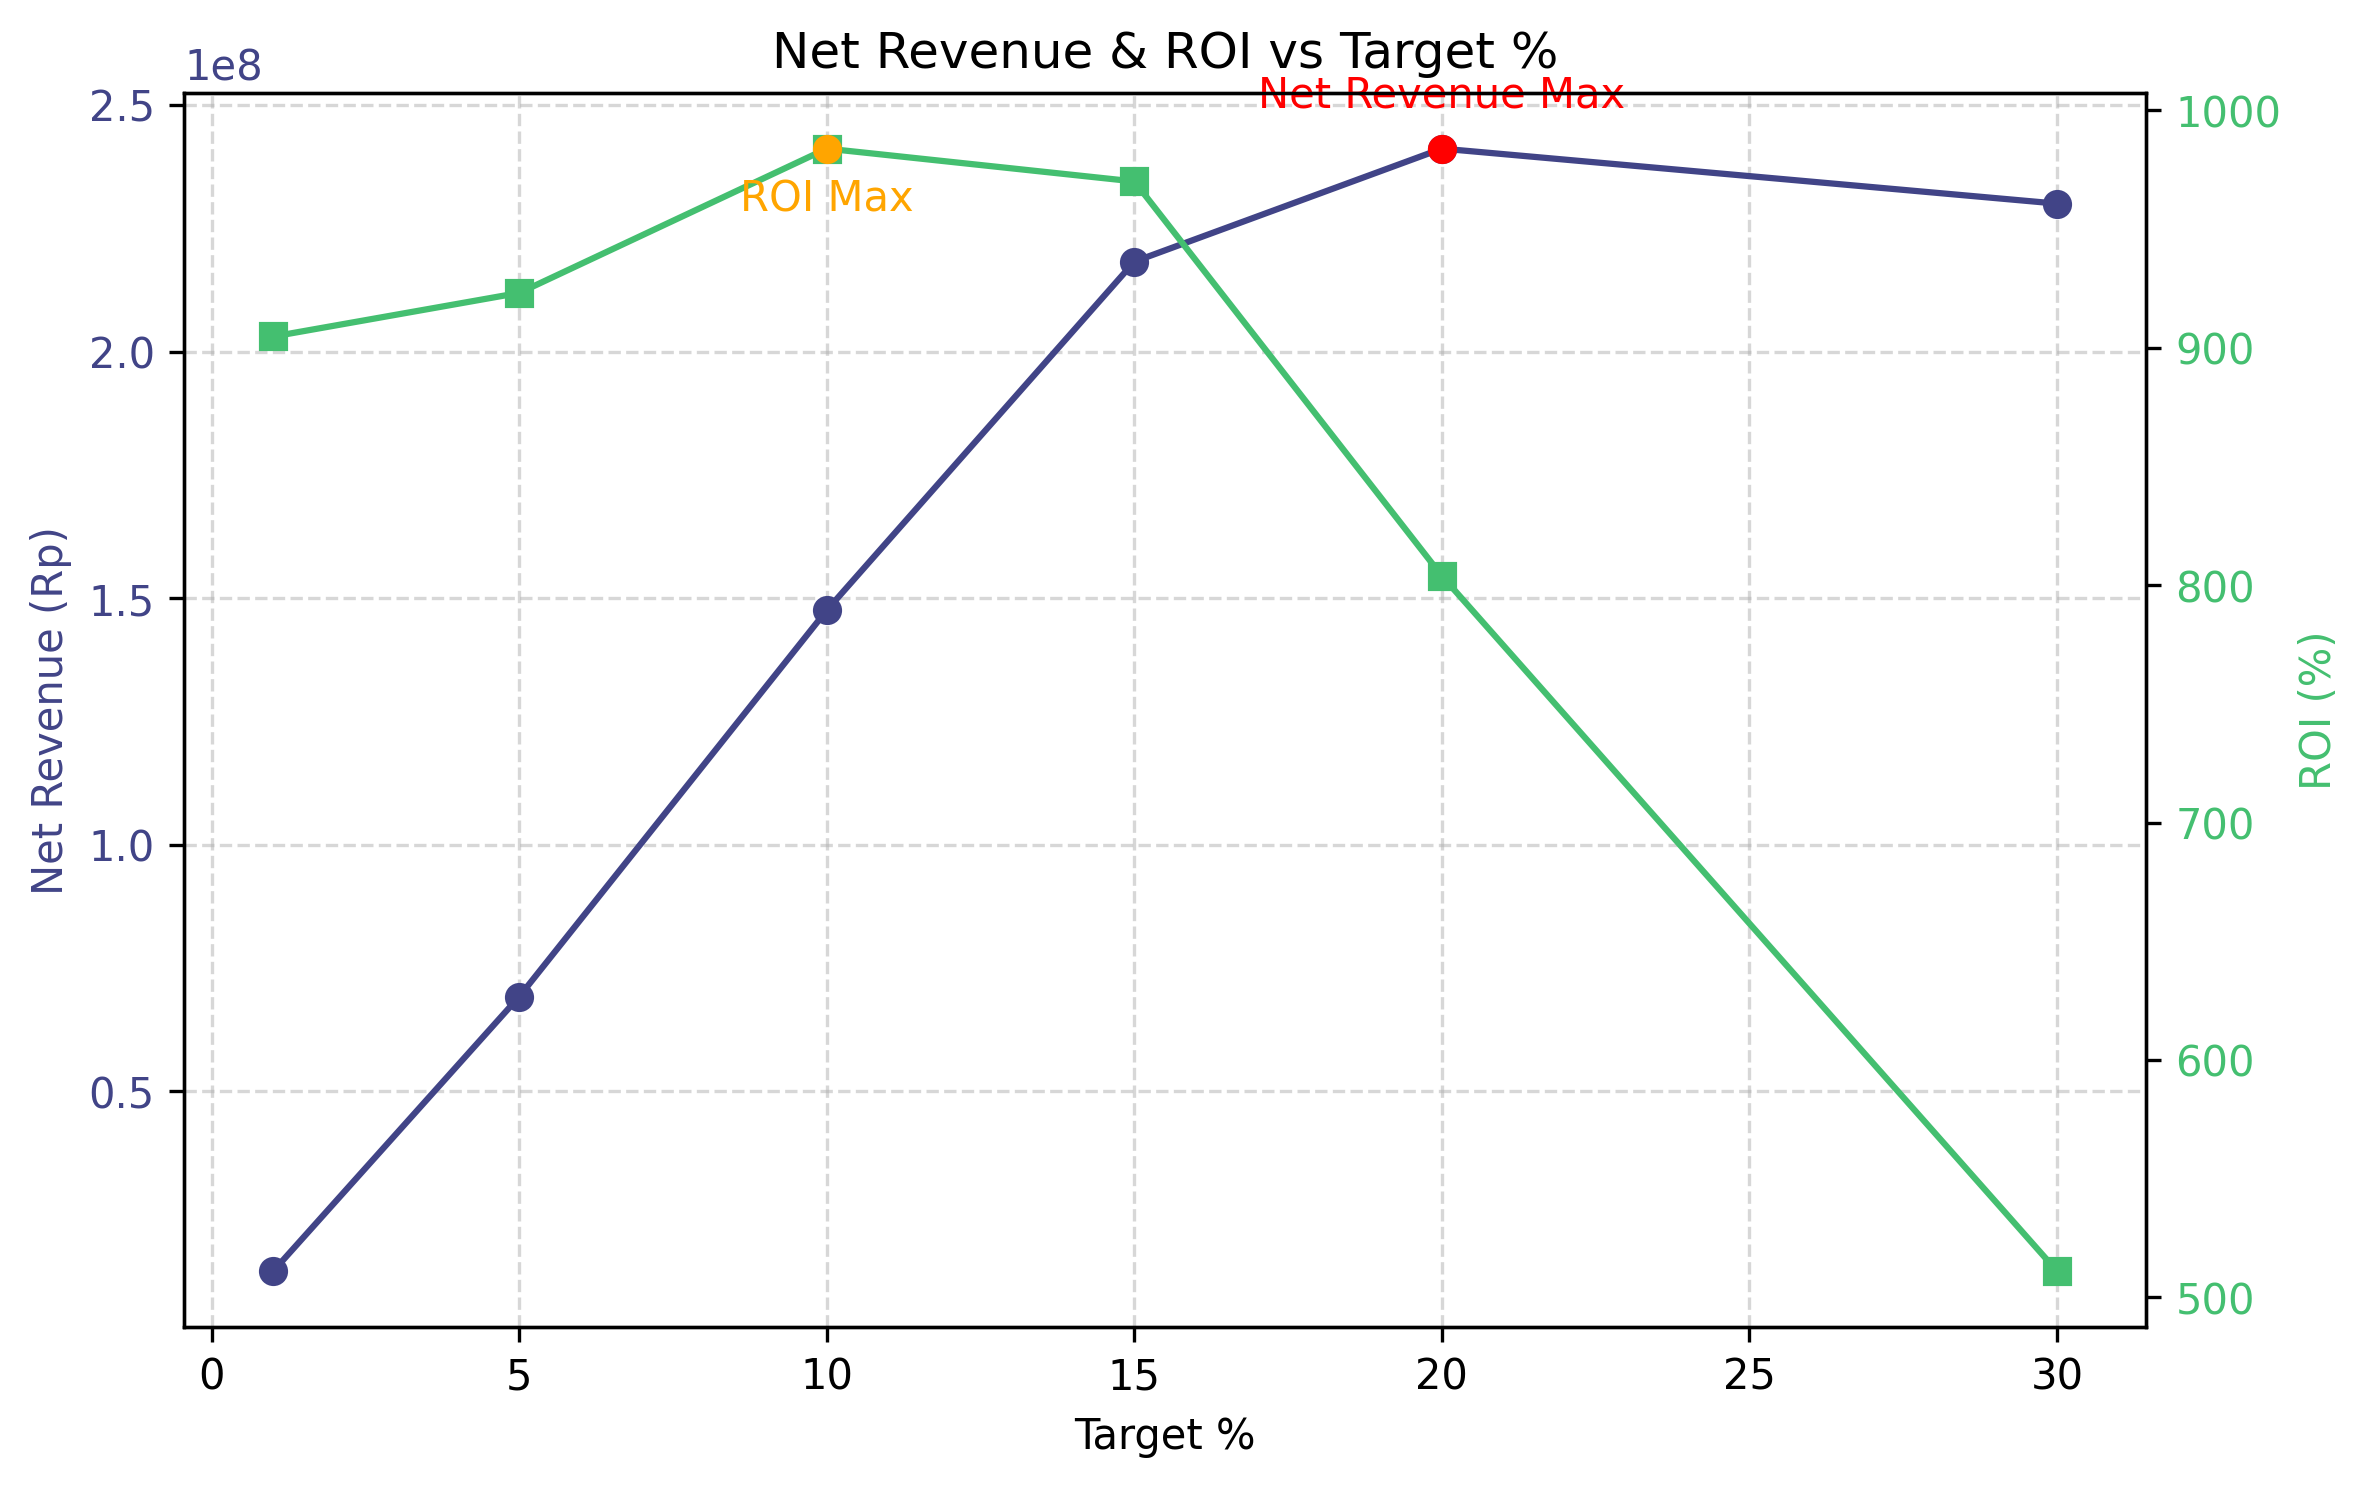

In [63]:
# Line Chart: Net Revenue & ROI vs Target %
# Purpose: To help stakeholders visualize the trade-off between campaign coverage (target %) and financial outcomes (net revenue) as well as efficiency (ROI).
# Insight: Stakeholders can immediately see at which point ROI starts to decline or net revenue is optimal.

fig, ax1 = plt.subplots(figsize=config.FIGURE_SIZE, dpi=config.DPI)

color = plt.get_cmap(config.COLOR_PALETTE)(0.2)
ax1.set_xlabel('Target %')
ax1.set_ylabel('Net Revenue (Rp)', color=color)
ax1.plot(df_simulation['target_pct'], df_simulation['net_revenue'], marker='o', color=color, label='Net Revenue')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, linestyle='--', alpha=0.5)

# Highlight net revenue max
max_idx = df_simulation['net_revenue'].idxmax()
ax1.scatter(df_simulation['target_pct'][max_idx], df_simulation['net_revenue'][max_idx], color='red', zorder=5)
ax1.annotate('Net Revenue Max', 
             (df_simulation['target_pct'][max_idx], df_simulation['net_revenue'][max_idx]),
             textcoords="offset points", xytext=(0,10), ha='center', color='red')

ax2 = ax1.twinx()
color2 = plt.get_cmap(config.COLOR_PALETTE)(0.7)
ax2.set_ylabel('ROI (%)', color=color2)
ax2.plot(df_simulation['target_pct'], df_simulation['roi'], marker='s', color=color2, label='ROI (%)')
ax2.tick_params(axis='y', labelcolor=color2)

# Highlight ROI max
roi_max_idx = df_simulation['roi'].idxmax()
ax2.scatter(df_simulation['target_pct'][roi_max_idx], df_simulation['roi'][roi_max_idx], color='orange', zorder=5)
ax2.annotate('ROI Max', 
             (df_simulation['target_pct'][roi_max_idx], df_simulation['roi'][roi_max_idx]),
             textcoords="offset points", xytext=(0,-15), ha='center', color='orange')

fig.tight_layout()
plt.title('Net Revenue & ROI vs Target %')
plt.show()

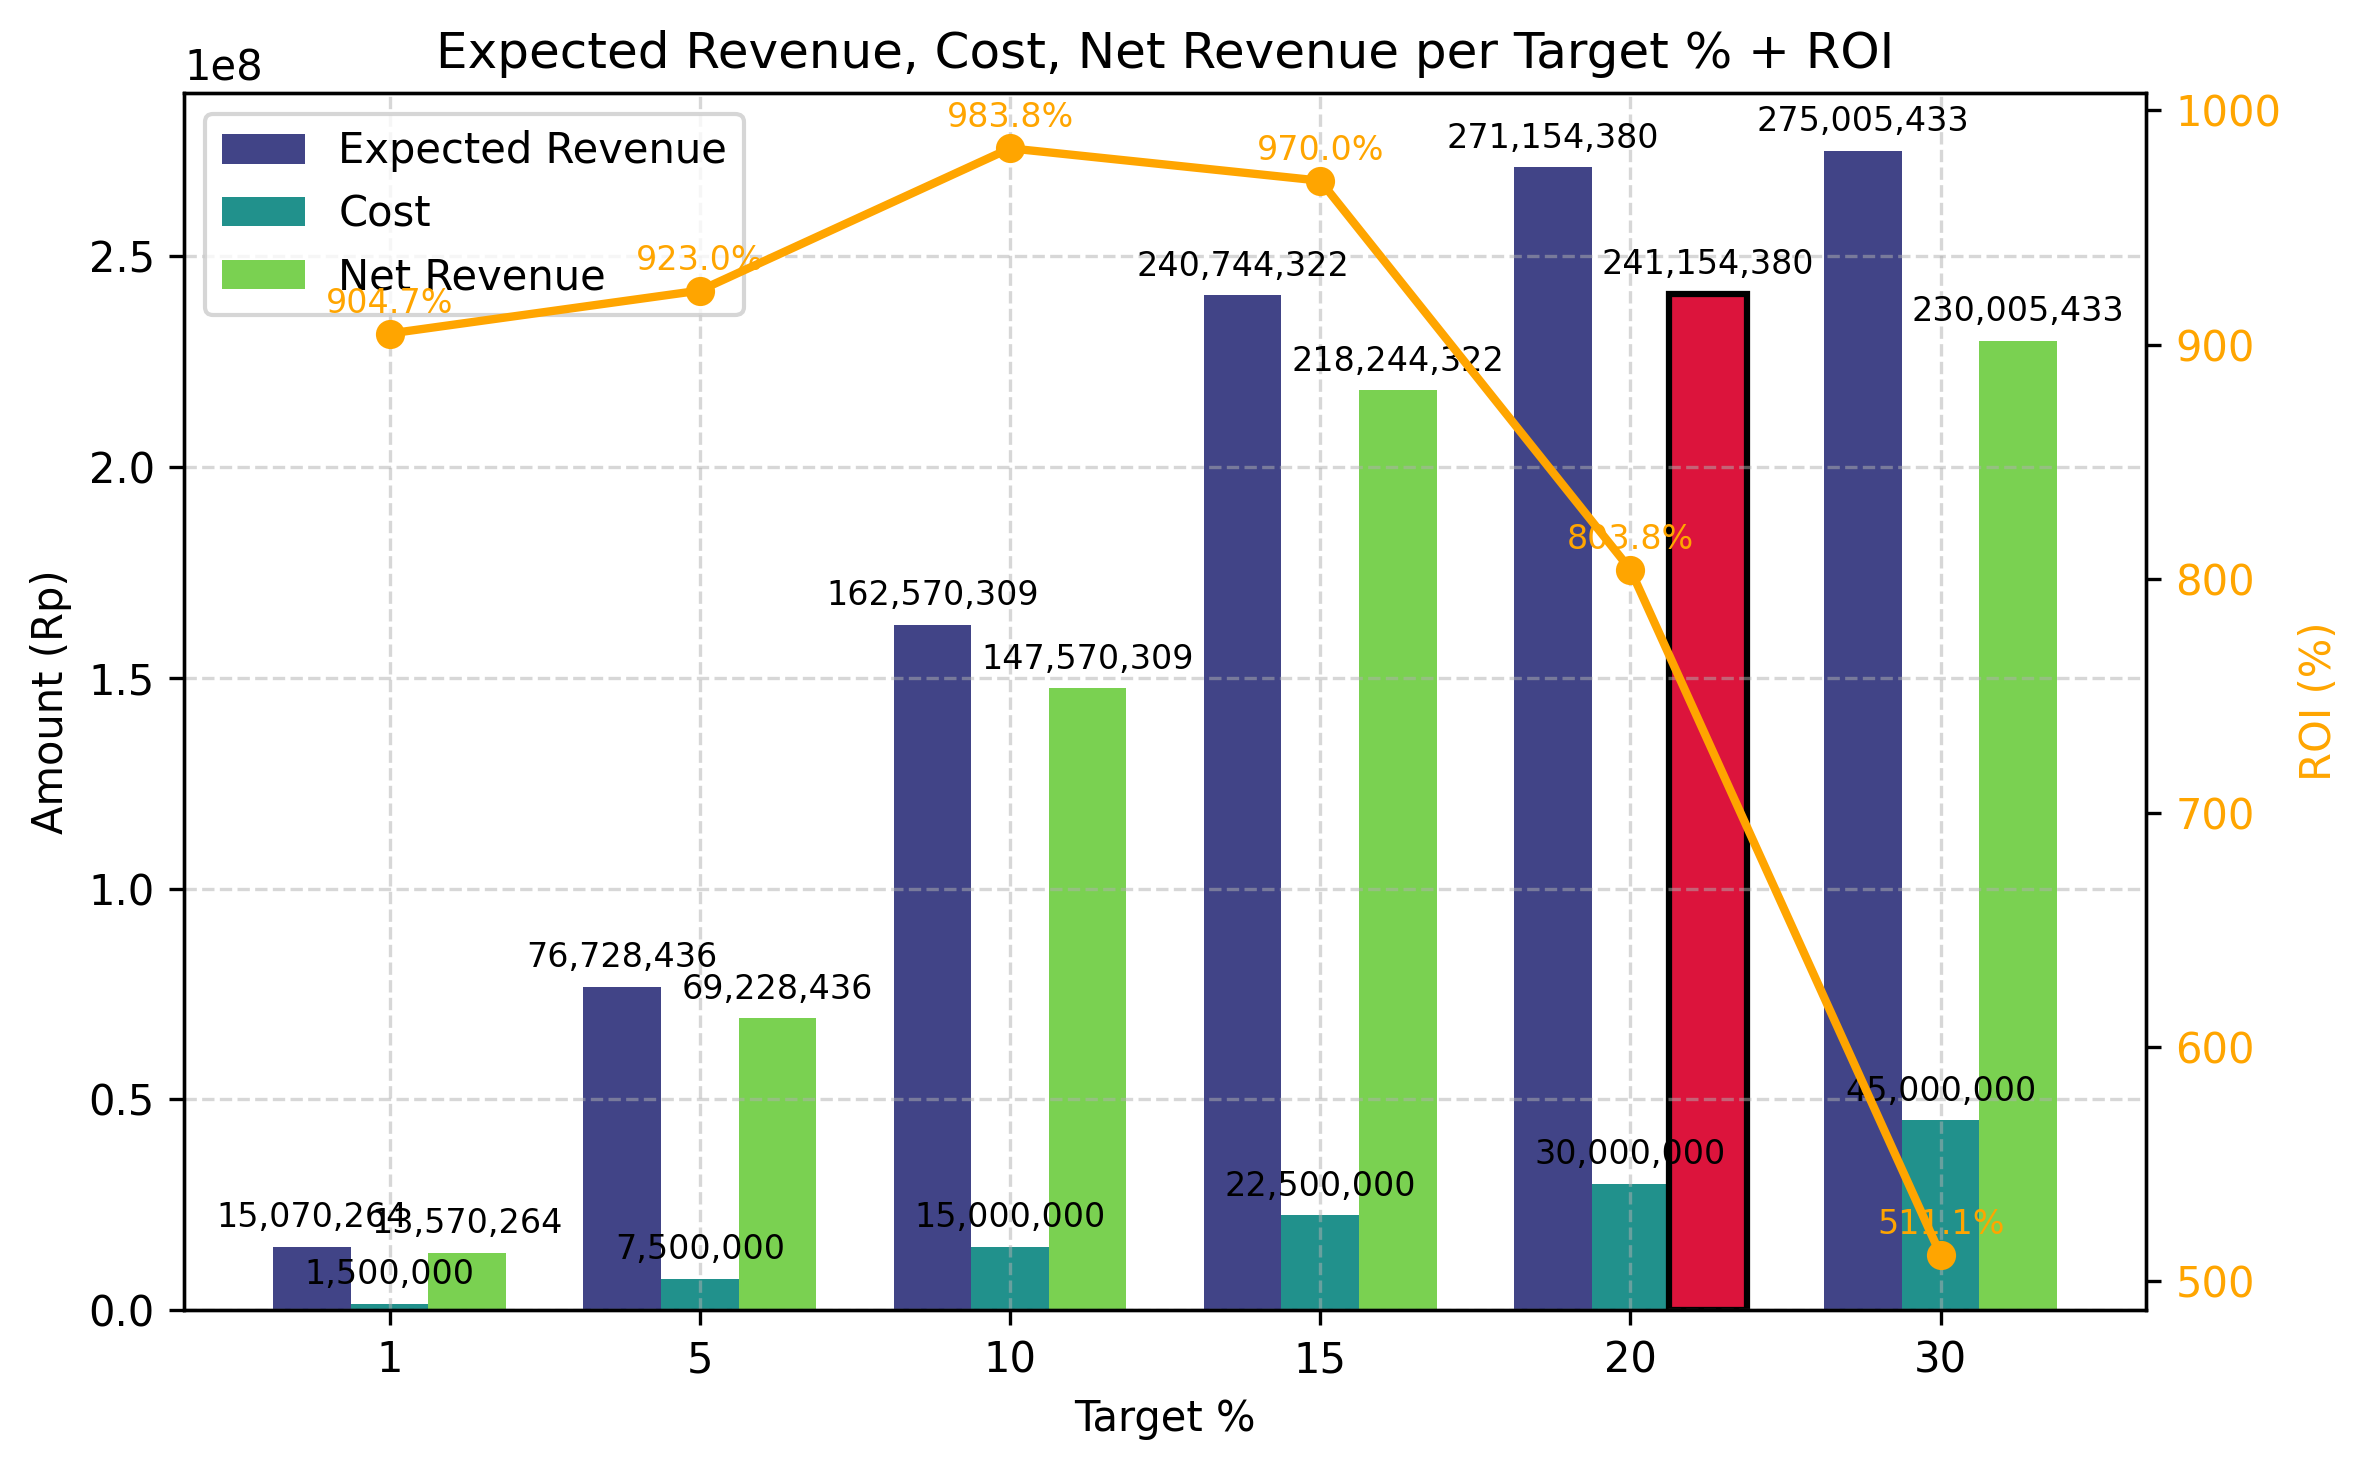

In [64]:
# Bar Chart: Expected Revenue, Cost, Net Revenue per Target % + ROI Line + Data Labels + Highlight
bar_width = 0.25
x = np.arange(len(df_simulation['target_pct']))

fig, ax1 = plt.subplots(figsize=config.FIGURE_SIZE, dpi=config.DPI)
cmap = plt.get_cmap(config.COLOR_PALETTE)

# Highlight net revenue max
net_rev = df_simulation['net_revenue']
max_idx = net_rev.idxmax()
colors_net = [cmap(0.8) if i != max_idx else 'crimson' for i in range(len(net_rev))]

bars1 = ax1.bar(x - bar_width, df_simulation['expected_revenue'], width=bar_width, label='Expected Revenue', color=cmap(0.2))
bars2 = ax1.bar(x, df_simulation['campaign_cost'], width=bar_width, label='Cost', color=cmap(0.5))
bars3 = ax1.bar(x + bar_width, net_rev, width=bar_width, label='Net Revenue', color=colors_net, edgecolor=['black' if i == max_idx else 'none' for i in range(len(net_rev))], linewidth=1.5)

# Data labels
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax1.annotate(f'{height:,.0f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)
add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

ax1.set_xlabel('Target %')
ax1.set_ylabel('Amount (Rp)')
ax1.set_title('Expected Revenue, Cost, Net Revenue per Target % + ROI')
ax1.set_xticks(x)
ax1.set_xticklabels(df_simulation['target_pct'])
ax1.legend(loc='upper left')
ax1.grid(True, linestyle='--', alpha=0.5)

# ROI line on secondary axis
ax2 = ax1.twinx()
ax2.plot(x, df_simulation['roi'], marker='o', color='orange', label='ROI (%)', linewidth=2)
ax2.set_ylabel('ROI (%)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# ROI data labels
for i, v in enumerate(df_simulation['roi']):
    ax2.annotate(f'{v:.1f}%', (x[i], v), textcoords="offset points", xytext=(0, 5), ha='center', color='orange', fontsize=8)

fig.tight_layout()
plt.show()

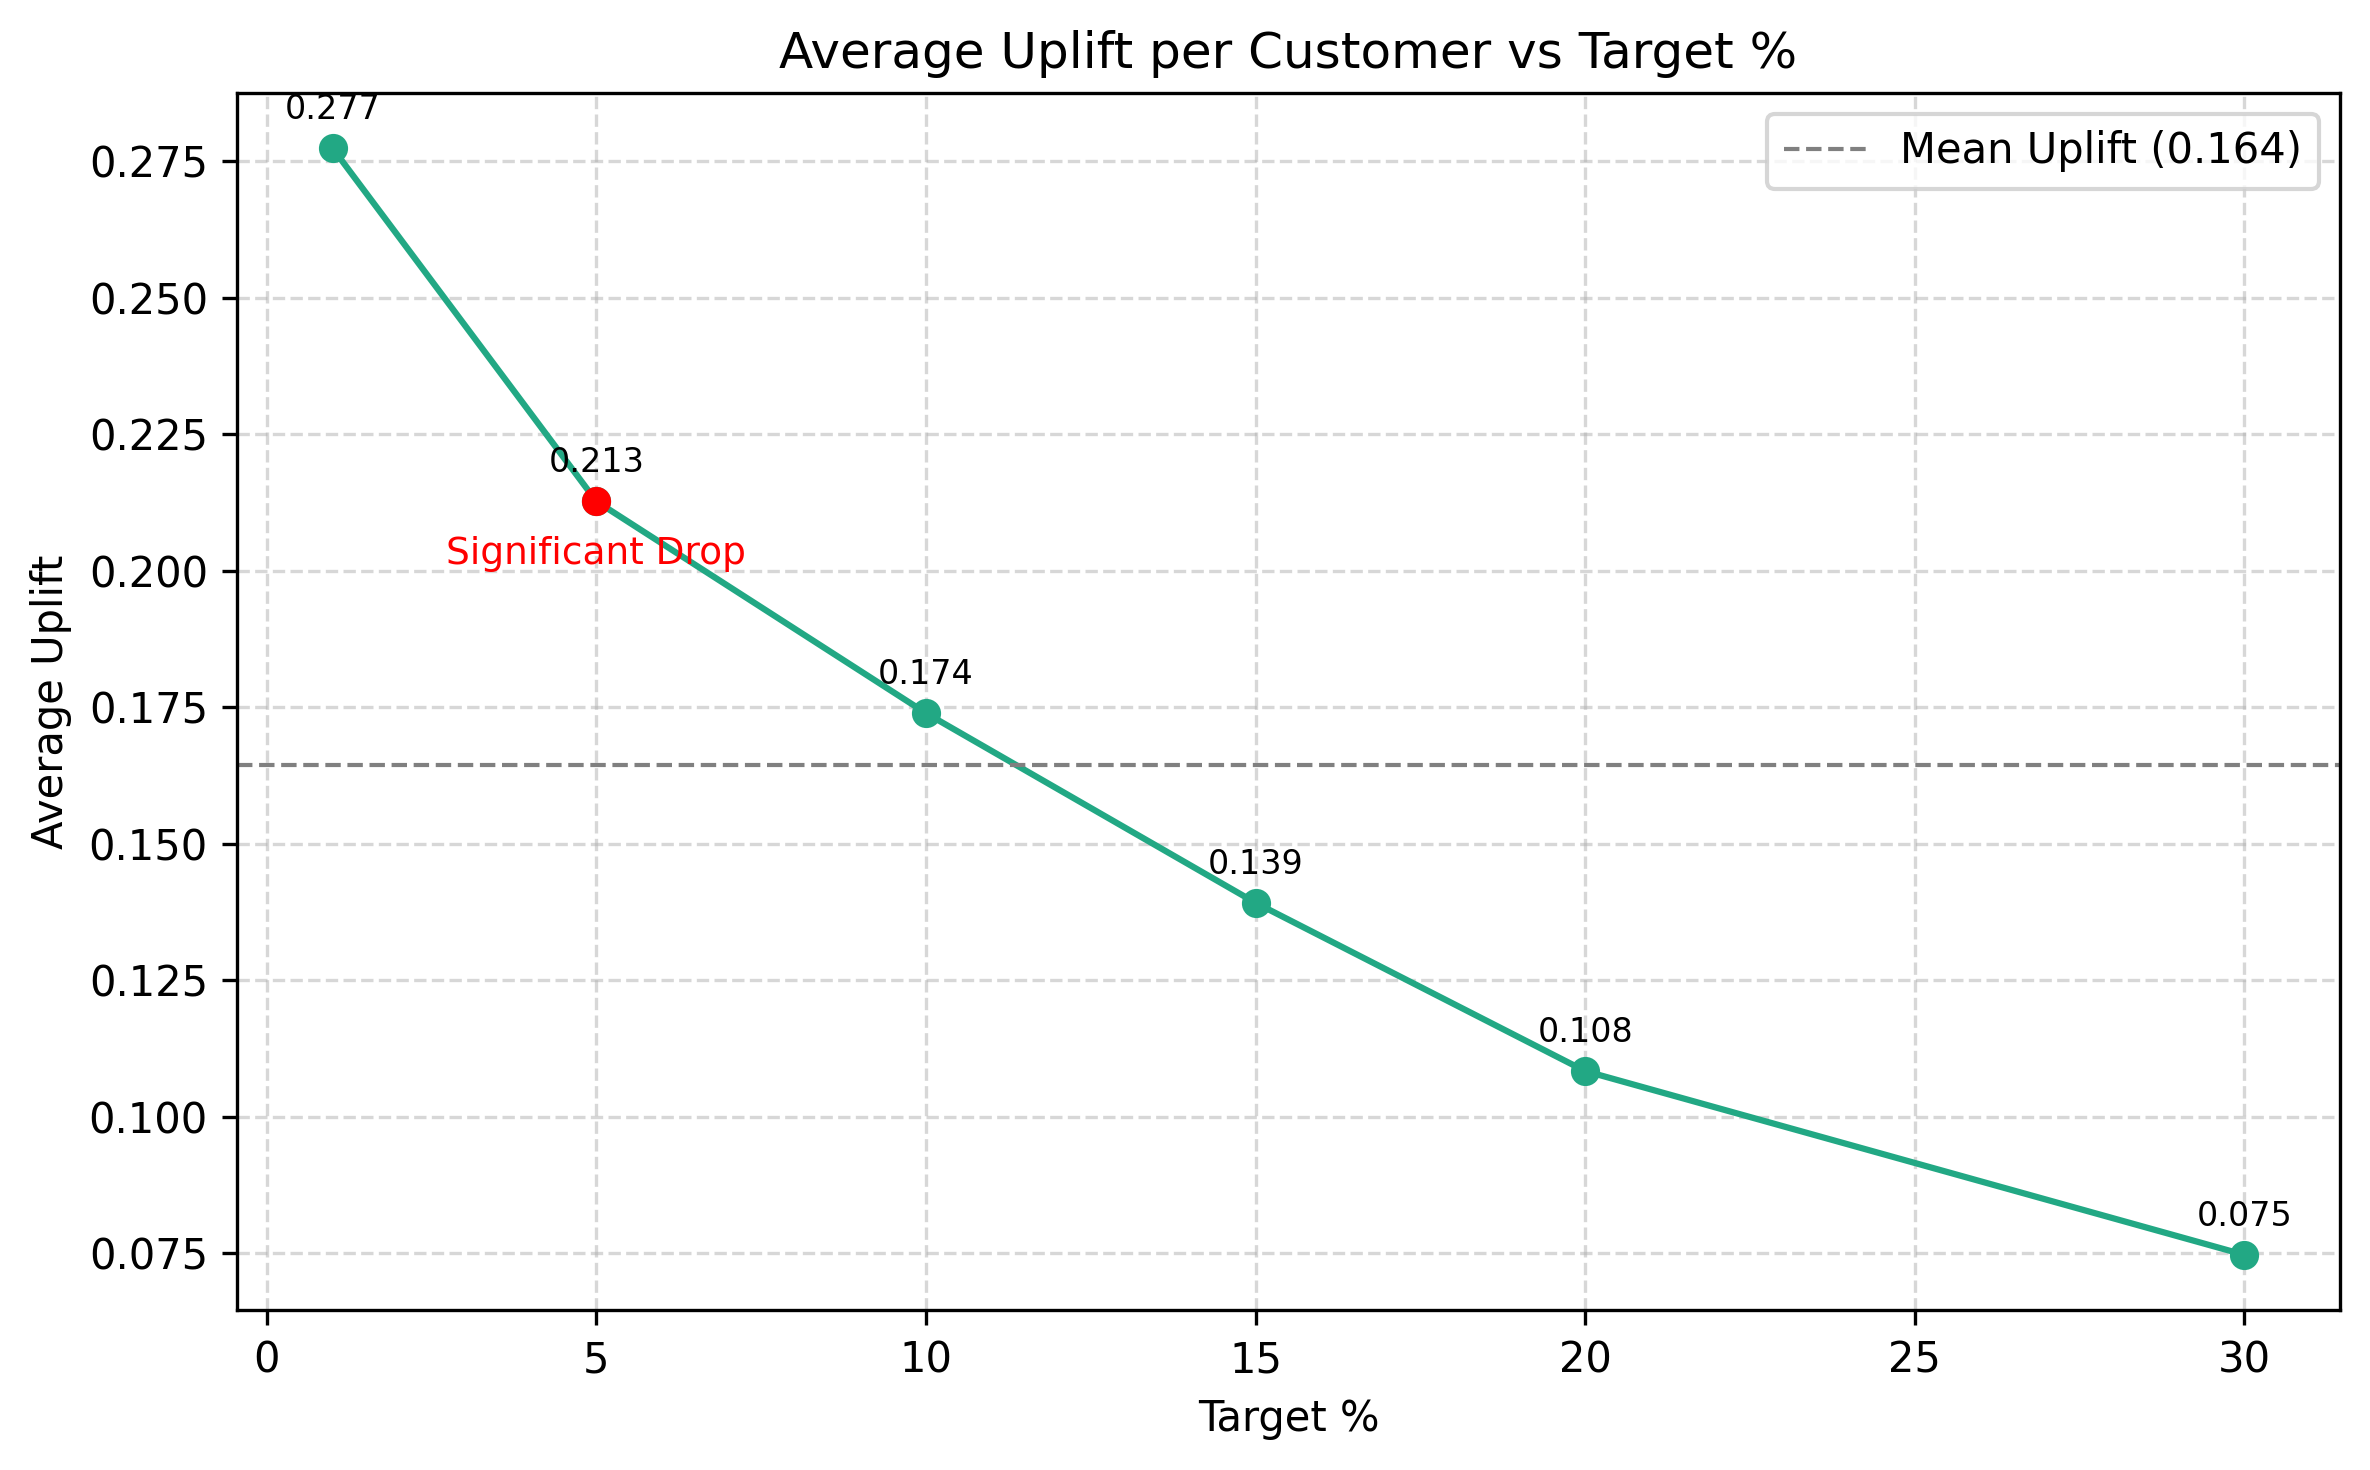

In [65]:
# Line Chart: Average Uplift vs Target % + Data Labels + Mean Line + Highlight Drop
fig, ax = plt.subplots(figsize=config.FIGURE_SIZE, dpi=config.DPI)
cmap = plt.get_cmap(config.COLOR_PALETTE)

x = df_simulation['target_pct']
y = df_simulation['avg_uplift']
ax.plot(x, y, marker='o', color=cmap(0.6))

# Data labels
def add_labels(ax, x, y):
    for xi, yi in zip(x, y):
        ax.annotate(f'{yi:.3f}', (xi, yi), textcoords="offset points", xytext=(0, 7), ha='center', fontsize=8)
add_labels(ax, x, y)

# Mean line
y_mean = y.mean()
ax.axhline(y_mean, color='gray', linestyle='--', linewidth=1, label=f'Mean Uplift ({y_mean:.3f})')

# Highlight significant drop (if any)
drop_idx = (y.diff() < -0.01).idxmax() if (y.diff() < -0.01).any() else None
if drop_idx is not None and drop_idx != 0:
    ax.scatter(x[drop_idx], y[drop_idx], color='red', zorder=5)
    ax.annotate('Significant Drop', (x[drop_idx], y[drop_idx]), textcoords="offset points", xytext=(0, -15), ha='center', color='red', fontsize=9)

ax.set_xlabel('Target %')
ax.set_ylabel('Average Uplift')
ax.set_title('Average Uplift per Customer vs Target %')
ax.grid(True, linestyle='--', alpha=0.5)
ax.legend()
plt.tight_layout()
plt.show()

### 🌐 Network Analysis - Customer Influence Modeling

Adding graph-based insights to understand customer influence and network effects:

In [69]:
# CUSTOMER INFLUENCE NETWORK ANALYSIS - PROCEDURAL FUNCTION
print("🌐 CUSTOMER NETWORK INFLUENCE ANALYSIS")
print("-" * 50)
print("🎯 Goal: Identify influential customers who can drive viral campaign effects")

def build_customer_similarity_network(df, threshold=0.8):
    """
    Build a NetworkX graph between customers based on feature similarity.
    df: Combined DataFrame (should include profile & usage)
    threshold: similarity threshold (0.95 = 95%)
    Return: graph, customer list, statistics
    """
    print("\n🔗 BUILDING CUSTOMER SIMILARITY NETWORK")
    if len(df) > 1000:
        df = df.nlargest(1000, 'ARPU').reset_index(drop=True)
    print(f"   👥 Analyzing top {len(df)} customers by ARPU for network efficiency")

    # Encode categorical features
    df_enc = df.copy()
    for col in ['city', 'plan_type', 'gender']:
        if col in df_enc.columns:
            le = LabelEncoder()
            df_enc[col + '_encoded'] = le.fit_transform(df_enc[col].astype(str))

    # Select features for similarity (encoded + numeric)
    feature_cols = [
        'age', 'ARPU', 'tenure_months',
        'data_usage_gb_mean', 'voice_minutes_mean', 'sms_count_mean',
        'app_usage_social_hr_mean', 'app_usage_gaming_hr_mean',
        'city_encoded', 'plan_type_encoded', 'gender_encoded'
    ]
    feature_cols = [col for col in feature_cols if col in df_enc.columns]

    # Normalize all features
    scaler = MinMaxScaler()
    features_matrix = scaler.fit_transform(df_enc[feature_cols])

    customers_list = []
    for idx, row in df_enc.iterrows():
        features = features_matrix[idx]
        customers_list.append({
            'customer_id': row['customer_id'],
            'features': features,
            'city': row['city'],
            'ARPU': row['ARPU'],
            'plan_type': row['plan_type']
        })

    # Build similarity graph
    G = nx.Graph()
    connections = 0
    cities = set()
    connection_strengths = []
    for i in range(len(customers_list)):
        for j in range(i + 1, len(customers_list)):
            a, b = customers_list[i], customers_list[j]
            dot = np.dot(a['features'], b['features'])
            norm_a = np.linalg.norm(a['features'])
            norm_b = np.linalg.norm(b['features'])
            if norm_a > 0 and norm_b > 0:
                sim = dot / (norm_a * norm_b)
                if sim >= threshold:
                    G.add_edge(a['customer_id'], b['customer_id'], weight=sim, similarity=sim)
                    connections += 1
                    connection_strengths.append(sim)
                    cities.add(a['city'])
                    cities.add(b['city'])
    avg_strength = np.mean(connection_strengths) if connection_strengths else 0

    # Save the network graph
    joblib.dump(G, '../model/network_graph.gpickle')
    
    print(f"\n✅ Created network with {connections} connections")
    print(f"   🏙️ Connections across {len(cities)} cities")
    print(f"   🔗 Avg connection strength: {avg_strength:.3f}")
    return G, customers_list, (connections, len(cities), avg_strength)

# Build the customer similarity network
G, customers_list, stats = build_customer_similarity_network(master_features)

🌐 CUSTOMER NETWORK INFLUENCE ANALYSIS
--------------------------------------------------
🎯 Goal: Identify influential customers who can drive viral campaign effects

🔗 BUILDING CUSTOMER SIMILARITY NETWORK
   👥 Analyzing top 1000 customers by ARPU for network efficiency

✅ Created network with 259770 connections
   🏙️ Connections across 10 cities
   🔗 Avg connection strength: 0.885


In [70]:
def calculate_centrality_metrics(G):
    """
    Calculate degree, betweenness, eigenvector, and pagerank centrality metrics for the network.
    Return: dict of centrality metrics
    """
    import networkx as nx
    print("\n📊 CALCULATING NETWORK INFLUENCE SCORES")
    print("-" * 40)
    # Check if the network has any nodes
    if G.number_of_nodes() == 0:
        print("⚠️ No network connections found. Try lowering similarity threshold.")
        return {}
    print("   🔄 Computing centrality metrics...")
    # Degree centrality: how many direct connections each node has
    degree = nx.degree_centrality(G)
    # Betweenness centrality: how often a node appears on shortest paths between other nodes
    betweenness = nx.betweenness_centrality(G, k=min(100, G.number_of_nodes()))
    # Eigenvector centrality: influence of a node based on its connections' influence
    try:
        eigenvector = nx.eigenvector_centrality(G, max_iter=1000)
    except:
        eigenvector = {node: 0 for node in G.nodes()}
    # PageRank: importance of nodes based on link structure
    pagerank = nx.pagerank(G, alpha=0.85)
    print(f"\n✅ Centrality metrics calculated for {G.number_of_nodes()} customers")
    print(f"   📊 Network density: {nx.density(G):.4f}")
    print(f"   🔗 Average clustering coefficient: {nx.average_clustering(G):.4f}")
    return {'degree': degree, 'betweenness': betweenness, 'eigenvector': eigenvector, 'pagerank': pagerank}

# Calculate centrality metrics
centrality_scores = calculate_centrality_metrics(G)

# Display top 5 customers by degree centrality
top_degree = sorted(centrality_scores['degree'].items(), key=lambda x: x[1], reverse=True)[:5]
df_top_degree = pd.DataFrame(top_degree, columns=['customer_id', 'degree_centrality'])
print("\n🏆 Top 5 Customers by Degree Centrality:")
print(df_top_degree)


📊 CALCULATING NETWORK INFLUENCE SCORES
----------------------------------------
   🔄 Computing centrality metrics...

✅ Centrality metrics calculated for 1000 customers
   📊 Network density: 0.5201
   🔗 Average clustering coefficient: 0.7787

🏆 Top 5 Customers by Degree Centrality:
   customer_id  degree_centrality
0        18926               0.84
1        29595               0.83
2        23201               0.81
3        18773               0.80
4        15903               0.79


In [71]:
def create_influence_scores(df, G, centrality, uplift_data):
    """
    Combine centrality, uplift, and ARPU into a single influence score.
    Return: DataFrame of influence_scores
    """
    influence_data = []
    # Iterate over each customer node in the network
    for node in G.nodes():
        # Get centrality scores for the node
        degree_score = centrality['degree'].get(node, 0)
        betweenness_score = centrality['betweenness'].get(node, 0)
        eigenvector_score = centrality['eigenvector'].get(node, 0)
        pagerank_score = centrality['pagerank'].get(node, 0)
        # Get customer profile
        cust = df[df['customer_id'] == node].iloc[0]
        # Get uplift score for the customer
        uplift_row = uplift_data[uplift_data['customer_id'] == node]
        uplift_score = uplift_row['uplift_score'].iloc[0] if len(uplift_row) > 0 else 0
        # Calculate network influence as the average of the four centrality metrics
        network_influence = 0.25 * degree_score + 0.25 * betweenness_score + 0.25 * eigenvector_score + 0.25 * pagerank_score
        # Normalize ARPU (capped at 1.0 for ARPU >= 200,000)
        arpu_norm = min(cust['ARPU'] / 200000, 1.0)
        # Final influence score: weighted sum of network influence, uplift, and ARPU
        final_score = 0.4 * network_influence + 0.4 * uplift_score + 0.2 * arpu_norm
        # Collect all relevant info for the customer
        influence_data.append({
            'customer_id': node,
            'influence_score': final_score,
            'network_influence': network_influence,
            'degree_centrality': degree_score,
            'betweenness_centrality': betweenness_score,
            'eigenvector_centrality': eigenvector_score,
            'pagerank': pagerank_score,
            'uplift_score': uplift_score,
            'ARPU': cust['ARPU'],
            'connections': G.degree(node),
            'city': cust['city'],
            'plan_type': cust['plan_type'],
            'age': cust['age'],
            'tenure_months': cust['tenure_months']
        })
    # Create DataFrame and sort by influence score
    df_inf = pd.DataFrame(influence_data).sort_values('influence_score', ascending=False)
    print(f"✅ Influence scores created for {len(df_inf)} customers")
    print(f"   📈 Score range: {df_inf['influence_score'].min():.3f} - {df_inf['influence_score'].max():.3f}")
    return df_inf

# Create influence scores DataFrame
df_influence = create_influence_scores(master_features, G, centrality_scores, master_features)

# Save influence scores
df_influence.to_csv('../model/result/df_influence.csv', index=False)

df_influence.head()

✅ Influence scores created for 1000 customers
   📈 Score range: 0.093 - 0.350


,customer_id,influence_score,network_influence,degree_centrality,betweenness_centrality,eigenvector_centrality,pagerank,uplift_score,ARPU,connections,city,plan_type,age,tenure_months
456,8942,0.35,0.16,0.61,7.29e-04,0.04,1.13e-03,0.33,154726,612,Yogyakarta,Halo Postpaid,36,11.0
778,18953,0.35,0.20,0.76,1.31e-03,0.05,1.38e-03,0.34,131461,761,Tangerang,Halo Postpaid,56,26.0
609,18242,0.35,0.19,0.72,1.17e-03,0.04,1.32e-03,0.32,140892,724,Semarang,Halo Postpaid,68,11.0
145,2118,0.34,0.11,0.43,3.22e-04,0.02,8.57e-04,0.38,147735,428,Bandung,Halo Postpaid,62,5.0
680,1153,0.34,0.15,0.58,7.44e-04,0.04,1.08e-03,0.36,136632,576,Depok,Halo Postpaid,28,19.0


In [72]:
def get_top_influencers(df_inf, top_n=10):
    """
    Print and return the top-N influencers from the influence score DataFrame.
    """
    print(f"🏆 TOP {top_n} INFLUENTIAL CUSTOMERS:")
    print("-" * 70)
    print(f"{'Customer':<10} {'Influence':<10} {'ARPU':<13} {'Uplift':<8} {'Connections':<12} {'City':<10}")
    print("-" * 70)
    # Print each top influencer's details
    for _, row in df_inf.head(top_n).iterrows():
        print(f"{int(row['customer_id']):<10} {row['influence_score']:<10.3f} "
              f"Rp {row['ARPU']:>8,.0f} {row['uplift_score']:<8.3f} "
              f"{row['connections']:<12.1f} {row['city']:<10}")
    return df_inf.head(top_n)

# Display top 10 influencers
top_influencers = get_top_influencers(df_influence, top_n=10)

🏆 TOP 10 INFLUENTIAL CUSTOMERS:
----------------------------------------------------------------------
Customer   Influence  ARPU          Uplift   Connections  City      
----------------------------------------------------------------------
8942       0.350      Rp  154,726 0.326    612.0        Yogyakarta
18953      0.347      Rp  131,461 0.337    761.0        Tangerang 
18242      0.346      Rp  140,892 0.319    724.0        Semarang  
2118       0.344      Rp  147,735 0.379    428.0        Bandung   
1153       0.340      Rp  136,632 0.356    576.0        Depok     
17751      0.340      Rp  137,955 0.354    565.0        Bekasi    
7267       0.339      Rp  143,193 0.351    515.0        Jakarta   
358        0.336      Rp  137,501 0.303    721.0        Yogyakarta
18773      0.335      Rp  158,942 0.228    795.0        Yogyakarta
18456      0.331      Rp  144,884 0.312    579.0        Yogyakarta


In [73]:
def generate_campaign_strategy(df_inf, G):
    """
    Print insights for a network-based campaign strategy.
    """
    print("\n🎯 NETWORK-BASED CAMPAIGN STRATEGY")
    print("-" * 50)
    print("💡 Target influential customers first - they can create viral effects!")

    # Identify top 1% influencers
    total_customers = len(df_inf)
    top_1_percent = max(1, int(total_customers * 0.01))
    print(f"🌟 Top 1% influencers: {top_1_percent} customers")

    # Identify highly connected customers (top 5% by connections)
    threshold = df_inf['connections'].quantile(0.95)
    high_connected = len(df_inf[df_inf['connections'] >= threshold])
    print(f"🌐 High-connected customers: {high_connected} customers")

    # Return campaign strategy and network statistics
    return {
        'total_customers': total_customers,
        'top_1_percent': top_1_percent,
        'high_connected': high_connected,
        'network_stats': {
            'nodes': G.number_of_nodes(),
            'edges': G.number_of_edges(),
            'density': nx.density(G),
            'clustering': nx.average_clustering(G)
        }
    }

# Generate and print campaign strategy insights
campaign_strategy = generate_campaign_strategy(df_influence, G)


🎯 NETWORK-BASED CAMPAIGN STRATEGY
--------------------------------------------------
💡 Target influential customers first - they can create viral effects!
🌟 Top 1% influencers: 10 customers
🌐 High-connected customers: 50 customers


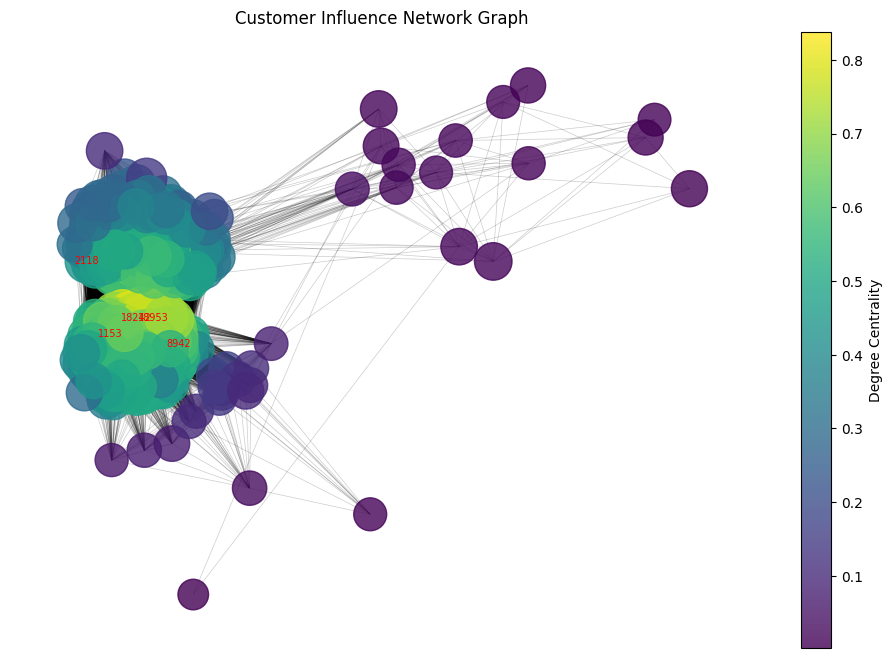

In [74]:
# Ambil influence score dan degree centrality untuk setiap node
influence_dict = df_influence.set_index('customer_id')['influence_score'].to_dict()
degree_dict = df_influence.set_index('customer_id')['degree_centrality'].to_dict()

# Set node size dan warna
node_sizes = [300 + 2000 * influence_dict.get(node, 0) for node in G.nodes()]
node_colors = [degree_dict.get(node, 0) for node in G.nodes()]

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42, k=0.15)  # Layout graph

nodes = nx.draw_networkx_nodes(
    G, pos,
    node_size=node_sizes,
    node_color=node_colors,
    cmap=plt.get_cmap(config.COLOR_PALETTE),
    alpha=0.8
)
edges = nx.draw_networkx_edges(G, pos, alpha=0.2, width=0.5)
plt.colorbar(nodes, label='Degree Centrality')
plt.title('Customer Influence Network Graph')
plt.axis('off')

# Label top 5 nodes by influence score
top_nodes = sorted(influence_dict, key=influence_dict.get, reverse=True)[:5]
labels = {node: str(node) for node in top_nodes}
nx.draw_networkx_labels(G, pos, labels, font_size=7, font_color='red')

plt.show()

### 🔍 Model Explainability & Business Insights

Understanding WHY the model makes certain predictions - critical for business buy-in:

In [75]:
print("🏆 TOP BUSINESS DRIVERS FOR CAMPAIGN SUCCESS")
print("The most influential features for campaign uplift (according to the model)\n")

# 1. Top Feature Importance (from model.feature_importances_)
print(f"{'Feature':<30} {'Importance':>10}")
print("-" * 42)
# Display feature importance table with name and value
for i, (_, row) in enumerate(feature_importance_conv.head(10).iterrows(), 1):
    print(f"{i}. {row['feature']:<30} : {row['importance']*100:.2f}%")

print("\n💡 Insight: Focus your strategy on the features above to maximize campaign uplift.")

🏆 TOP BUSINESS DRIVERS FOR CAMPAIGN SUCCESS
The most influential features for campaign uplift (according to the model)

Feature                        Importance
------------------------------------------
1. campaign_uplift_mean           : 25.80%
2. campaign_converted             : 25.57%
3. campaign_network_interaction   : 24.35%
4. campaign_count                 : 5.87%
5. campaign_data_interaction      : 3.98%
6. days_since_last_campaign       : 0.98%
7. data_usage_gb_rolling7         : 0.92%
8. data_arpu_interaction          : 0.84%
9. data_usage_gb_mean             : 0.82%
10. data_usage_gb_sum              : 0.80%

💡 Insight: Focus your strategy on the features above to maximize campaign uplift.


In [76]:
# PLAN TYPE PERFORMANCE
print("📱 PLAN TYPE PERFORMANCE:")
print(f"{'Plan Type':<25} {'Customers':>10} {'Avg Uplift':>12} {'Avg ARPU':>15}")
print("-" * 60)

plan_perf = (
    df_influence.groupby('plan_type')[['customer_id', 'uplift_score', 'ARPU']]
    .agg({'customer_id': 'count', 'uplift_score': 'mean', 'ARPU': 'mean'})
    .rename(columns={'customer_id': 'Customers', 'uplift_score': 'Avg Uplift', 'ARPU': 'Avg ARPU'})
    .reset_index()
    .sort_values('Avg Uplift', ascending=False)
)

# Save plan_performance
plan_perf.to_csv('../model/result/plan_perf.csv', index=False)

for i, row in enumerate(plan_perf.itertuples(index=False), 1):
    print(f"{i}. {row.plan_type:<22} {row.Customers:>10}   {row._2*100:>9.2f}%  Rp. {row._3:>12,.2f}")

# GEOGRAPHIC PERFORMANCE
print("\n\n🗺️ GEOGRAPHIC PERFORMANCE:")
print(f"{'City':<15} {'Customers':>10} {'Avg Uplift':>12} {'Avg ARPU':>15}")
print("-" * 60)

geo_perf = (
    df_influence.groupby('city')[['customer_id', 'uplift_score', 'ARPU']]
    .agg({'customer_id': 'count', 'uplift_score': 'mean', 'ARPU': 'mean'})
    .rename(columns={'customer_id': 'Customers', 'uplift_score': 'Avg Uplift', 'ARPU': 'Avg ARPU'})
    .reset_index()
    .sort_values('Avg Uplift', ascending=False)
    .head(5)
)

# Save geographic performance
geo_perf.to_csv('../model/result/geo_perf.csv', index=False)

for i, row in enumerate(geo_perf.itertuples(index=False), 1):
    print(f"{i}. {row.city:<12} {row.Customers:>10}   {row._2*100:>9.2f}%  Rp. {row._3:>12,.2f}")

print("\n💡 Insight: Focus on high-performing plan types and cities to maximize customer uplift.")

📱 PLAN TYPE PERFORMANCE:
Plan Type                  Customers   Avg Uplift        Avg ARPU
------------------------------------------------------------
1. Halo Postpaid                 966        3.55%  Rp.   144,855.78
2. Combo Sakti 50GB               34        3.25%  Rp.   136,296.29


🗺️ GEOGRAPHIC PERFORMANCE:
City             Customers   Avg Uplift        Avg ARPU
------------------------------------------------------------
1. Yogyakarta          100        4.95%  Rp.   144,678.47
2. Bandung              86        4.21%  Rp.   142,976.59
3. Depok               108        3.83%  Rp.   144,983.59
4. Bekasi              100        3.67%  Rp.   144,363.90
5. Jakarta              80        3.60%  Rp.   144,028.20

💡 Insight: Focus on high-performing plan types and cities to maximize customer uplift.


In [77]:
# 3. Network & Influence Insights
print("🌐 NETWORK & INFLUENCE INSIGHTS:")
print("-" * 50)
print(f"- Total number of nodes in the network: {G.number_of_nodes()}")
print(f"- Total number of connections (edges) between nodes: {G.number_of_edges()}")
print(f"- Network density (proportion of actual to possible connections): {nx.density(G):.4f}")

print("\n🏆 TOP 5 INFLUENCERS:")
print(f"{'No':<3} {'Customer ID':<10} {'Influence':>10} {'ARPU':>13} {'Uplift':>10} {'Connections':>12} {'City':>12}")
print("-" * 80)
top5 = df_influence[['customer_id', 'influence_score', 'ARPU', 'uplift_score', 'connections', 'city']].head(5)
for i, row in enumerate(top5.itertuples(index=False), 1):
    print(f"{i}. {row.customer_id:<10} {row.influence_score*100:>9.2f}%  Rp. {row.ARPU:>10,.0f} {row.uplift_score*100:>9.2f}% {row.connections:>12} {row.city:>12}")

print("\n💡 Insight: Prioritise these top influencers for campaigns—they can help maximize campaign effectiveness and revenue uplift.")

🌐 NETWORK & INFLUENCE INSIGHTS:
--------------------------------------------------
- Total number of nodes in the network: 1000
- Total number of connections (edges) between nodes: 259770
- Network density (proportion of actual to possible connections): 0.5201

🏆 TOP 5 INFLUENCERS:
No  Customer ID  Influence          ARPU     Uplift  Connections         City
--------------------------------------------------------------------------------
1. 8942           35.03%  Rp.    154,726     32.57%          612   Yogyakarta
2. 18953          34.74%  Rp.    131,461     33.73%          761    Tangerang
3. 18242          34.58%  Rp.    140,892     31.94%          724     Semarang
4. 2118           34.42%  Rp.    147,735     37.85%          428      Bandung
5. 1153           34.04%  Rp.    136,632     35.58%          576        Depok

💡 Insight: Prioritise these top influencers for campaigns—they can help maximize campaign effectiveness and revenue uplift.


### 🧠 SHAP Explainability - Advanced ML Interpretability

This is where we showcase truly advanced ML engineering - explaining model decisions:

In [79]:
# ADVANCED MODEL EXPLAINABILITY WITH SHAP
shap.initjs()

print("\n📊 SHAP ANALYSIS - MODEL INTERPRETABILITY")
print("-" * 50)

# Sample data for efficiency
sample_size = min(1000, len(X_train))
X_sample = X_train.sample(sample_size, random_state=42)

# SHAP explainer for RandomForest
explainer = shap.TreeExplainer(rf_conversion)
shap_values = explainer.shap_values(X_sample)

# Get SHAP values for positive class (conversion=1)
if isinstance(shap_values, list):
    shap_values_pos = shap_values[1]
else:
    shap_values_pos = shap_values

print(f"SHAP analysis completed for {sample_size} customers.")

# Handle different SHAP value dimensions
if shap_values_pos.ndim == 3:
    shap_importance_values = np.abs(shap_values_pos[:, :, 1]).mean(0)
elif shap_values_pos.ndim == 2:
    shap_importance_values = np.abs(shap_values_pos).mean(0)
else:
    shap_importance_values = np.abs(shap_values_pos)

# Feature importance from SHAP
feature_importance_shap = pd.DataFrame({
    'fitur': X_sample.columns,
    'shap_importance': shap_importance_values
}).sort_values('shap_importance', ascending=False)

# Save SHAP feature importance
feature_importance_shap.to_csv('../model/result/feature_importance_shap.csv', index=False)



📊 SHAP ANALYSIS - MODEL INTERPRETABILITY
--------------------------------------------------
SHAP analysis completed for 1000 customers.


In [80]:
print("🏆 TOP 10 FEATURES BY SHAP IMPORTANCE:")
for i, (_, row) in enumerate(feature_importance_shap.head(10).iterrows()):
    print(f"   {i+1}. {row['fitur']}: {row['shap_importance']*100:.2f}%")

print("\n💡 Insight: These features have the highest impact on conversion predictions according to SHAP analysis.")

🏆 TOP 10 FEATURES BY SHAP IMPORTANCE:
   1. campaign_converted: 8.28%
   2. campaign_uplift_mean: 8.18%
   3. campaign_network_interaction: 7.89%
   4. campaign_count: 2.16%
   5. campaign_data_interaction: 1.55%
   6. data_usage_gb_rolling7: 0.49%
   7. days_since_last_campaign: 0.49%
   8. data_arpu_interaction: 0.47%
   9. data_usage_gb_sum: 0.39%
   10. data_usage_gb_mean: 0.39%

💡 Insight: These features have the highest impact on conversion predictions according to SHAP analysis.


In [81]:
# Customer-level explanations
print("\n🔍 INDIVIDUAL CUSTOMER EXPLANATIONS:")
print("-" * 50)

customer_idx = 0

# Get customer SHAP values
if shap_values_pos.ndim == 3:
    customer_shap = shap_values_pos[customer_idx, :, 1]
else:
    customer_shap = shap_values_pos[customer_idx]

customer_features = X_sample.iloc[customer_idx]

print(f"👤 Customer Analysis (Sample #{customer_idx}):")
print(f"   🎯 Predicted conversion probability: {rf_conversion.predict_proba(customer_features.values.reshape(1, -1))[0][1]*100:.2f}%")

# Top positive and negative SHAP contributors
shap_contrib = pd.DataFrame({
    'feature': X_sample.columns,
    'shap_value': customer_shap,
    'feature_value': customer_features.values
}).sort_values('shap_value', key=abs, ascending=False)

print("\n   📈 Top factors INCREASING conversion probability:")
positive_shap = shap_contrib[shap_contrib['shap_value'] > 0].head(5)
for _, row in positive_shap.iterrows():
    print(f"      ✅ {row['feature']}: +{row['shap_value']*100:.2f}% (value: {row['feature_value']:.2f})")

print("\n   📉 Top factors DECREASING conversion probability:")
negative_shap = shap_contrib[shap_contrib['shap_value'] < 0].head(3)
for _, row in negative_shap.iterrows():
    # change feature in percent
    print(f"      ❌ {row['feature']}: {row['shap_value']*100:.2f}% (value: {row['feature_value']:.2f})")



🔍 INDIVIDUAL CUSTOMER EXPLANATIONS:
--------------------------------------------------
👤 Customer Analysis (Sample #0):
   🎯 Predicted conversion probability: 0.49%

   📈 Top factors INCREASING conversion probability:
      ✅ data_usage_gb_max: +0.34% (value: 13.09)
      ✅ voice_per_rupiah: +0.10% (value: 0.00)
      ✅ data_user_type: +0.06% (value: 0.00)
      ✅ data_usage_gb_mean: +0.05% (value: 6.25)
      ✅ data_usage_gb_std: +0.04% (value: 5.93)

   📉 Top factors DECREASING conversion probability:
      ❌ campaign_uplift_mean: -5.63% (value: 0.00)
      ❌ campaign_converted: -5.25% (value: 0.00)
      ❌ campaign_network_interaction: -5.21% (value: 0.00)


In [82]:
print("\n💡 Insight:")
if not positive_shap.empty:
    top_pos = positive_shap.iloc[0]
    print(f"This customer has high conversion potential because of their high {top_pos['feature']} (value: {top_pos['feature_value']:.2f}).")
    print("Recommendation: Target this customer with a relevant promotion or special offer.")
else:
    print("No major positive factors significantly increase this customer's conversion potential.")

if not negative_shap.empty:
    top_neg = negative_shap.iloc[0]
    print(f"However, low {top_neg['feature']} (value: {top_neg['feature_value']:.2f}) is the main barrier to conversion.")
    print("\nSuggestion: Address this barrier with product education or a tailored offer.")


💡 Insight:
This customer has high conversion potential because of their high data_usage_gb_max (value: 13.09).
Recommendation: Target this customer with a relevant promotion or special offer.
However, low campaign_uplift_mean (value: 0.00) is the main barrier to conversion.

Suggestion: Address this barrier with product education or a tailored offer.


## 🚀 Interactive Gradio Dashboard!

Let's create an interactive dashboard that showcases all our AI predictions and insights!

In [2]:
# Load DataFrame
master_features = pd.read_csv('../model/result/master_features.csv')
simulation_results = pd.read_csv('../model/result/simulation_results.csv')
plan_perf = pd.read_csv('../model/result/plan_perf.csv')
geo_perf = pd.read_csv('../model/result/geo_perf.csv')
df_influence = pd.read_csv('../model/result/df_influence.csv')
feature_importance_shap = pd.read_csv('../model/result/feature_importance_shap.csv')

# Load Network Graph
G = joblib.load('../model/network_graph.gpickle')

# Load Models
rf_conversion = joblib.load('../model/rf_conversion.pkl')
rf_revenue = joblib.load('../model/rf_revenue.pkl')
rf_treatment = joblib.load('../model/rf_treatment.pkl')
rf_control = joblib.load('../model/rf_control.pkl')

# Load LabelEncoders
le_dict_uplift = joblib.load('../model/label_encoders_uplift.pkl')
le_dict = joblib.load('../model/label_encoders.pkl')

In [5]:
# Tab 1: Ranking & Targeting
def tab1() -> gr.Blocks:
    cols = [
        'customer_id', 'age', 'gender', 'city', 'plan_type', 'ARPU',
        'data_user_type', 'social_user_type', 'gaming_user_type', 'network_quality_score',
        'campaign_count', 'campaign_converted', 'campaign_uplift_mean', 'uplift_score',
        'treatment_prob', 'control_prob', 'campaign_network_interaction', 'campaign_data_interaction',
        'data_usage_gb_rolling7', 'data_arpu_interaction', 'data_usage_gb_sum', 'data_usage_gb_mean',
        'days_since_last_campaign', 'complaints_count'
    ]
    df = master_features.sort_values(by=['uplift_score', 'ARPU'], ascending=[False, False])

    # Format columns for better readability
    df["gender"] = df["gender"].map({"M": "Male", "F": "Female"})
    df["ARPU"] = df["ARPU"].apply(lambda x: f"Rp {int(x):,}")
    df["network_quality_score"] = df["network_quality_score"].apply(lambda x: f"{int(x*100)}%")
    df["campaign_uplift_mean"] = df["campaign_uplift_mean"].apply(lambda x: f"Rp {int(round(x)):,}")
    df["uplift_score"] = df["uplift_score"].apply(lambda x: f"{x*100:.1f}%")
    df["treatment_prob"] = df["treatment_prob"].apply(lambda x: f"{x*100:.1f}%")
    df["control_prob"] = df["control_prob"].apply(lambda x: f"{x*100:.1f}%")
    df["campaign_network_interaction"] = df["campaign_network_interaction"].apply(lambda x: int(round(x)))
    df["campaign_data_interaction"] = df["campaign_data_interaction"].apply(lambda x: int(round(x)))
    df["data_usage_gb_rolling7"] = df["data_usage_gb_rolling7"].apply(lambda x: f"{x:.2f} GB")
    df["data_arpu_interaction"] = df["data_arpu_interaction"].apply(lambda x: int(round(x)))
    df["data_usage_gb_sum"] = df["data_usage_gb_sum"].apply(lambda x: f"{x} GB")
    df["data_usage_gb_mean"] = df["data_usage_gb_mean"].apply(lambda x: f"{x} GB")
    df["days_since_last_campaign"] = df["days_since_last_campaign"].apply(lambda x: f"{int(x)} days")
    df["complaints_count"] = df["complaints_count"].astype(int)

    # Display top 10 customers
    top10 = df[cols].head(10).reset_index(drop=True)
    top10.insert(0, 'No', range(1, len(top10) + 1))
    with gr.Blocks(title="Ranking & Targeting") as demo:
        gr.Markdown("## 🏆 Top 10 Customers for Next Campaign Targeting by Uplift Score & ARPU")
        gr.Dataframe(top10, interactive=False)
    return demo

In [6]:
# Function to run what-if analysis
def run_what_if(target_pct, cost_per_customer, revenue_multiplier):
    # Simulate campaign
    ranked_customers = master_features.sort_values('uplift_score', ascending=False).reset_index(drop=True)
    n_target = int(len(ranked_customers) * target_pct / 100)
    targeted_customers = ranked_customers.head(n_target)
    expected_conversions = targeted_customers['treatment_prob'].sum()
    avg_arpu = targeted_customers['ARPU'].mean() if n_target > 0 else 0
    expected_revenue = expected_conversions * avg_arpu * revenue_multiplier
    campaign_cost = n_target * cost_per_customer
    net_revenue = expected_revenue - campaign_cost
    roi = (net_revenue / campaign_cost) * 100 if campaign_cost > 0 else 0
    avg_uplift = targeted_customers['uplift_score'].mean() if n_target > 0 else 0
    result = f"""👥 Targeted customers: {n_target}
🤝 Expected conversions: {expected_conversions:,.0f}
📈 Expected revenue: Rp {expected_revenue:,.0f}
💸 Campaign cost: Rp {campaign_cost:,.0f}
📊 Net profit: Rp {net_revenue:,.0f}
💰 ROI: {roi:,.1f}%
🚀 Avg uplift per customer: {avg_uplift*100:.1f}%
📱 Avg ARPU: Rp {avg_arpu:,.0f}"""
    return result

# Tab 2: Campaign Simulation & What-If
def tab2() -> gr.Blocks:
    # Format simulation results for display
    df = pd.DataFrame(simulation_results) if not isinstance(simulation_results, pd.DataFrame) else simulation_results.copy()
    
    # Add formatted columns
    df["Target %"] = df["target_percentage"].apply(lambda x: f"{int(x)}%")
    cols = ["Target %"] + [col for col in df.columns if col not in ["Target %", "target_percentage"]]
    df_display = df[cols].copy()
    df_display["targeted_customers"] = df_display["targeted_customers"].apply(lambda x: f"{int(x):,}")
    df_display["expected_conversions"] = df_display["expected_conversions"].apply(lambda x: f"{int(round(x)):,}")
    df_display["expected_revenue"] = df_display["expected_revenue"].apply(lambda x: f"Rp {x:,.0f}")
    df_display["campaign_cost"] = df_display["campaign_cost"].apply(lambda x: f"Rp {x:,.0f}")
    df_display["net_revenue"] = df_display["net_revenue"].apply(lambda x: f"Rp {x:,.0f}")
    df_display["roi"] = df_display["roi"].apply(lambda x: f"{int(round(x))}%")
    df_display["avg_uplift"] = df_display["avg_uplift"].apply(lambda x: f"{x*100:.1f}%")
    df_display["avg_arpu"] = df_display["avg_arpu"].apply(lambda x: f"Rp {x:,.0f}")

    # Take the best scenario for insight
    best_row = df.loc[df["roi"].idxmax()]
    best_pct = int(best_row["target_percentage"])
    n_customers = f"<b>{int(best_row['targeted_customers']):,}</b>"
    roi = f"<b>{int(round(best_row['roi']))}%</b>"
    revenue = f"<b>Rp {best_row['expected_revenue']:,.0f}</b>"
    net_revenue = f"<b>Rp {best_row['net_revenue']:,.0f}</b>"
    expected_conversions = f"<b>{int(round(best_row['expected_conversions'])):,}</b>"
    avg_uplift = f"<b>{best_row['avg_uplift']*100:.1f}%</b>"

    # Insight text
    insight = (
        f"Based on the campaign simulation results, the most optimal strategy is to target the top <b>{best_pct}%</b> of customers ({n_customers} customers). "
        f"With this approach, the expected ROI is {roi}, expected conversions are {expected_conversions}, average uplift is {avg_uplift}, generating an estimated revenue of {revenue} and a net profit of {net_revenue}. "
        "This strategy offers the best balance between the number of targeted customers, potential revenue, and campaign cost efficiency."
    )

    # Graph 1: Line Chart - Net Revenue & ROI vs Target %
    fig1, ax1 = plt.subplots(figsize=(9, 6))
    color = 'tab:blue'
    ax1.set_xlabel('Target')
    ax1.set_ylabel('Net Revenue (Rp)', color=color)
    ax1.set_title("Net Revenue & ROI vs Target %")
    line1 = ax1.plot(df['Target %'], df['net_revenue'], color=color, marker='o', label='Net Revenue')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
    for i, v in enumerate(df['net_revenue']):
        ax1.annotate(f"Rp {int(v):,}", (i, v), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8, color=color)

    ax2 = ax1.twinx()
    color = 'tab:green'
    ax2.set_ylabel('ROI (%)', color=color)
    line2 = ax2.plot(df['Target %'], df['roi'], color=color, marker='x', label='ROI')
    ax2.tick_params(axis='y', labelcolor=color)
    for i, v in enumerate(df['roi']):
        ax2.annotate(f"{int(round(v))}%", (i, v), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8, color=color)


    # Highlight max Net Revenue
    max_net_idx = df['net_revenue'].idxmax()
    ax1.plot(max_net_idx, df['net_revenue'][max_net_idx], marker='o', color='red', markersize=10, label='Max Net Revenue')
    ax1.annotate('Max Net Revenue', (max_net_idx, df['net_revenue'][max_net_idx]), textcoords="offset points", xytext=(0,15), ha='center', fontsize=9, color='red')

    # Highlight max ROI
    max_idx = df['roi'].idxmax()
    ax2.plot(max_idx, df['roi'][max_idx], marker='o', color='red', markersize=10, label='Max ROI')
    ax2.annotate('Max ROI', (max_idx, df['roi'][max_idx]), textcoords="offset points", xytext=(0,15), ha='center', fontsize=9, color='red')

    fig1.tight_layout()

    # Graph 2: Bar Chart - Expected Revenue, Cost, Net Revenue per Target % + ROI Line + Data Labels + Highlight
    fig2, ax = plt.subplots(figsize=(9, 6))
    ax.set_title("Expected Revenue, Cost, Net Revenue per Target %")
    x = np.arange(len(df['Target %']))
    width = 0.25
    bars1 = ax.bar(x - width, df['expected_revenue'], width, label='Expected Revenue', color='#4e79a7')
    bars2 = ax.bar(x, df['campaign_cost'], width, label='Cost', color='#f28e2b')
    bars3 = ax.bar(x + width, df['net_revenue'], width, label='Net Revenue', color='#59a14f')
    
    # Data labels
    for bar in bars1: ax.annotate(f"{int(bar.get_height()):,}", (bar.get_x() + bar.get_width()/2, bar.get_height()), ha='center', va='bottom', fontsize=8)
    for bar in bars2: ax.annotate(f"{int(bar.get_height()):,}", (bar.get_x() + bar.get_width()/2, bar.get_height()), ha='center', va='bottom', fontsize=8)
    for bar in bars3: ax.annotate(f"{int(bar.get_height()):,}", (bar.get_x() + bar.get_width()/2, bar.get_height()), ha='center', va='bottom', fontsize=8)

    ax2b = ax.twinx()
    ax2b.plot(x, df['roi'], color='tab:red', marker='o', label='ROI (%)')
    for i, v in enumerate(df['roi']):
        ax2b.annotate(f"{int(round(v))}%", (x[i], v), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8, color='tab:red')

    # Highlight Max Net Revenue
    max_net_idx = df['net_revenue'].idxmax()
    ax.annotate('Max Net Revenue', (x[max_net_idx] + width, df['net_revenue'][max_net_idx]), textcoords="offset points", xytext=(0,15), ha='center', fontsize=9, color='green')

    # Highlight Max ROI
    max_roi_idx = df['roi'].idxmax()
    ax2b.annotate('Max ROI', (x[max_roi_idx], df['roi'][max_roi_idx]), textcoords="offset points", xytext=(0,15), ha='center', fontsize=9, color='red')
    
    ax.set_xticks(x)
    ax.set_xticklabels(df['Target %'])
    ax.set_xlabel('Target')
    ax.legend(loc='upper left')
    ax2b.legend(loc='upper right')
    ax.set_ylabel('Amount (Rp)')
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
    ax2b.set_ylabel('ROI (%)')
    fig2.tight_layout()

    # Graph 3: Line Chart - Average Uplift vs Target % + Data Labels + Mean Line + Highlight Drop
    fig3, ax = plt.subplots(figsize=(9, 6))
    ax.set_title("Average Uplift vs Target %")
    ax.plot(df['Target %'], df['avg_uplift']*100, marker='o', color='#1f77b4', label='Avg Uplift')
    for i, v in enumerate(df['avg_uplift']*100):
        ax.annotate(f"{v:.1f}%", (i, v), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8, color='#1f77b4')
    mean_uplift = (df['avg_uplift']*100).mean()
    ax.axhline(mean_uplift, color='gray', linestyle='--', label=f'Mean: {mean_uplift:.1f}%')

    # Highlight biggest drop: merah
    uplift_vals = df['avg_uplift']*100
    diffs = np.diff(uplift_vals)
    if len(diffs) > 0:
        drop_idx = np.argmin(diffs)
        ax.plot(drop_idx+1, uplift_vals.iloc[drop_idx+1], marker='o', color='red', markersize=10)
        ax.annotate('Significant Drop', (drop_idx+1, uplift_vals.iloc[drop_idx+1]), textcoords="offset points", xytext=(0,15), ha='center', fontsize=9, color='red')

    ax.set_xlabel('Target %')
    ax.set_ylabel('Average Uplift (%)')
    ax.legend()
    fig3.tight_layout()

    # Display in Gradio
    with gr.Blocks(title="Campaign Simulation & What-If") as demo:
        gr.Markdown("## 📊 Campaign Simulation Scenarios & Optimal Strategy Insight")
        gr.Dataframe(df_display, interactive=False)
        gr.Markdown(f"**💡 Insight:**\n\n{insight}", elem_id="insight")
        with gr.Row():
            gr.Plot(fig1, label="Net Revenue & ROI vs Target %")
            gr.Plot(fig2, label="Expected Revenue, Cost, Net Revenue per Target %")
            gr.Plot(fig3, label="Average Uplift vs Target %")
        
        gr.Markdown("---")
        gr.Markdown("## 📊 What-If Analysis")
        with gr.Row():
            with gr.Column():
                target_pct = gr.Slider(1, 100, value=5, label="Target % Customer")
                cost_per_customer = gr.Number(value=5000, label="Biaya per Customer")
                revenue_multiplier = gr.Number(value=1.2, label="Revenue Multiplier")
                btn = gr.Button("Run Prediction")
            with gr.Column():
                output = gr.Textbox(label="Hasil Analisis", lines=11)
        btn.click(run_what_if, inputs=[target_pct, cost_per_customer, revenue_multiplier], outputs=output)

    # Conclusion
    return demo

In [7]:
# Tab 3: Customer Segmentation with Actionable Insights
def tab3() -> None:
    # Format plan_perf and geo_perf for display (do not overwrite original)
    plan_perf_fmt = plan_perf.copy()
    geo_perf_fmt = geo_perf.copy()
    plan_perf_fmt['Avg Uplift'] = plan_perf_fmt['Avg Uplift'].astype(float)
    plan_perf_fmt['Avg ARPU'] = plan_perf_fmt['Avg ARPU'].astype(float)
    geo_perf_fmt['Avg Uplift'] = geo_perf_fmt['Avg Uplift'].astype(float)
    geo_perf_fmt['Avg ARPU'] = geo_perf_fmt['Avg ARPU'].astype(float)

    # Generate actionable insight for plan type
    top_plan = plan_perf_fmt.sort_values('Avg Uplift', ascending=False).iloc[0]
    avg_uplift_plan = plan_perf_fmt['Avg Uplift'].mean()
    uplift_diff_plan = (top_plan['Avg Uplift'] - avg_uplift_plan) / avg_uplift_plan * 100 if avg_uplift_plan != 0 else 0
    pot_revenue_plan = int(top_plan['Customers'] * top_plan['Avg ARPU'] * top_plan['Avg Uplift'])
    insight_plan = (
        f"💡 <b>Insight:</b> The plan type <b>{top_plan['plan_type']}</b> shows the highest uplift at <b>{top_plan['Avg Uplift']*100:.2f}%</b> "
        f"<i>(<b>{int(top_plan['Customers'])}</b> customers, ARPU <b>Rp {top_plan['Avg ARPU']:,.0f}</b>)</i>, "
        f"<b>{uplift_diff_plan:.1f}%</b> above the average of other plan types. "
        f"If all <b>{top_plan['plan_type']}</b> customers are targeted, the potential additional revenue is <b>Rp {pot_revenue_plan:,.0f}</b>. "
        f"<u>Recommendation:</u> Launch a dedicated campaign for this segment to maximize business impact."
    )

    # Format for display
    plan_perf_fmt['Avg Uplift'] = plan_perf_fmt['Avg Uplift'].apply(lambda x: f"{x*100:.2f}%")
    plan_perf_fmt['Avg ARPU'] = plan_perf_fmt['Avg ARPU'].apply(lambda x: f"Rp {x:,.0f}")

    # Generate actionable insight for city
    top_city = geo_perf_fmt.sort_values('Avg Uplift', ascending=False).iloc[0]
    avg_uplift_city = geo_perf_fmt['Avg Uplift'].mean()
    uplift_diff_city = (top_city['Avg Uplift'] - avg_uplift_city) / avg_uplift_city * 100 if avg_uplift_city != 0 else 0
    pot_revenue_city = int(top_city['Customers'] * top_city['Avg ARPU'] * top_city['Avg Uplift'])
    insight_geo = (
        f"💡 <b>Insight:</b> The city <b>{top_city['city']}</b> stands out with an uplift of <b>{top_city['Avg Uplift']*100:.2f}%</b> "
        f"<i>(<b>{int(top_city['Customers'])}</b> customers, ARPU <b>Rp {top_city['Avg ARPU']:,.0f}</b>)</i>, "
        f"<b>{uplift_diff_city:.1f}%</b> above the average of other cities. "
        f"<u>Recommendation:</u> Focus marketing budget and activities in <b>{top_city['city']}</b> to further increase conversion and revenue."
    )

    geo_perf_fmt['Avg Uplift'] = geo_perf_fmt['Avg Uplift'].apply(lambda x: f"{x*100:.2f}%")
    geo_perf_fmt['Avg ARPU'] = geo_perf_fmt['Avg ARPU'].apply(lambda x: f"Rp {x:,.0f}")

    with gr.Blocks(title="Customer Segmentation") as demo:
        gr.Markdown("## 📱 Plan Type Performance")
        gr.Dataframe(plan_perf_fmt, interactive=False)
        gr.Markdown(insight_plan)

        gr.Markdown("---")
        gr.Markdown("## 🗺️ Geographic Performance")
        gr.Dataframe(geo_perf_fmt, interactive=False)
        gr.Markdown(insight_geo)
    return demo

In [8]:
# Tab 4: Network Influence Analysis
def tab4() -> None:
    # Network & Influence Insights
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()
    density = nx.density(G)
    network_insight = (
        f"- Total number of nodes in the network: **{num_nodes:,}**\n"
        f"- Total number of connections (edges) between nodes: **{num_edges:,}**\n"
        f"- Network density (proportion of actual to possible connections): **{density:.4f}**\n"
    )

    # Top 10 Influential Customers Table
    top_influencers = df_influence.sort_values('influence_score', ascending=False).head(10).copy()
    cols = [
        'customer_id', 'influence_score', 'network_influence', 'degree_centrality', 'betweenness_centrality',
        'eigenvector_centrality', 'pagerank', 'uplift_score', 'ARPU', 'connections', 'city', 'plan_type', 'age'
    ]
    top_influencers = top_influencers[cols]
    top_influencers.insert(0, 'No', range(1, len(top_influencers) + 1))

    # Format numeric columns for display
    top_influencers['influence_score'] = top_influencers['influence_score'].apply(lambda x: f"{x:.4f}")
    top_influencers['network_influence'] = top_influencers['network_influence'].apply(lambda x: f"{x:.4f}")
    top_influencers['degree_centrality'] = top_influencers['degree_centrality'].apply(lambda x: f"{x:.4f}")
    top_influencers['betweenness_centrality'] = top_influencers['betweenness_centrality'].apply(lambda x: f"{x:.4f}")
    top_influencers['eigenvector_centrality'] = top_influencers['eigenvector_centrality'].apply(lambda x: f"{x:.4f}")
    top_influencers['pagerank'] = top_influencers['pagerank'].apply(lambda x: f"{x:.4f}")
    top_influencers['uplift_score'] = top_influencers['uplift_score'].apply(lambda x: f"{x*100:.2f}%")
    top_influencers['ARPU'] = top_influencers['ARPU'].apply(lambda x: f"Rp {x:,.0f}")

    # Get top influencer details for potential further insights
    top_row = top_influencers.iloc[0]
    insight_influencer = (
        f"💡 **Insight**: The most influential customers, such as customer ID **{top_row['customer_id']}** "
        f"(influence score: **{top_row['influence_score']}**), have a strong potential to **spread influence** across the network. "
        f"Prioritizing campaigns to these top influencers can accelerate message reach and **boost revenue**."
    )

    with gr.Blocks(title="Network Influence Analysis") as demo:
        gr.Markdown("## 🌐 Network & Influence Insights")
        gr.Markdown(network_insight)

        gr.Markdown("---")
        gr.Markdown("## 🏆 Top 10 Influential Customers")
        gr.Dataframe(top_influencers, interactive=False)
        gr.Markdown(insight_influencer)
    return demo

In [9]:
# Tab 5: Model Explainability
def tab5():
    # Top 10 Feature Importance Table by SHAP
    top10 = feature_importance_shap.head(10).copy()
    top10['No'] = range(1, len(top10) + 1)
    top10['SHAP Importance'] = top10['shap_importance'].apply(lambda x: f"{x*100:.2f}%")
    top10_table = top10[['No', 'fitur', 'SHAP Importance']]
    top10_table.columns = ['No', 'Feature', 'SHAP Importance']

    with gr.Blocks() as tab:
        gr.Markdown("## 🏆 Top 10 Features By SHAP Importance")
        gr.Dataframe(top10_table, interactive=False)
        gr.Markdown(f"💡 **Insight**: These features have the highest impact on conversion predictions according to SHAP analysis.")

    return tab

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


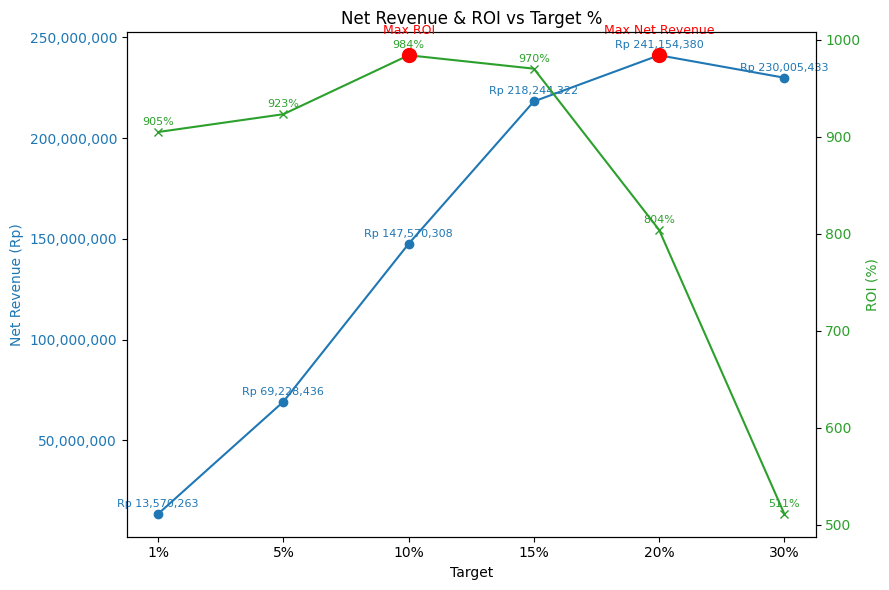

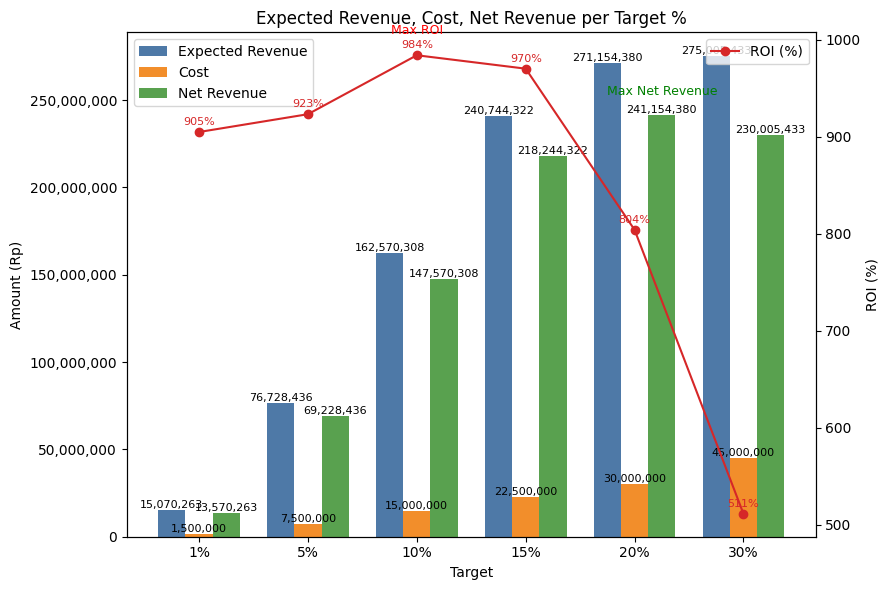

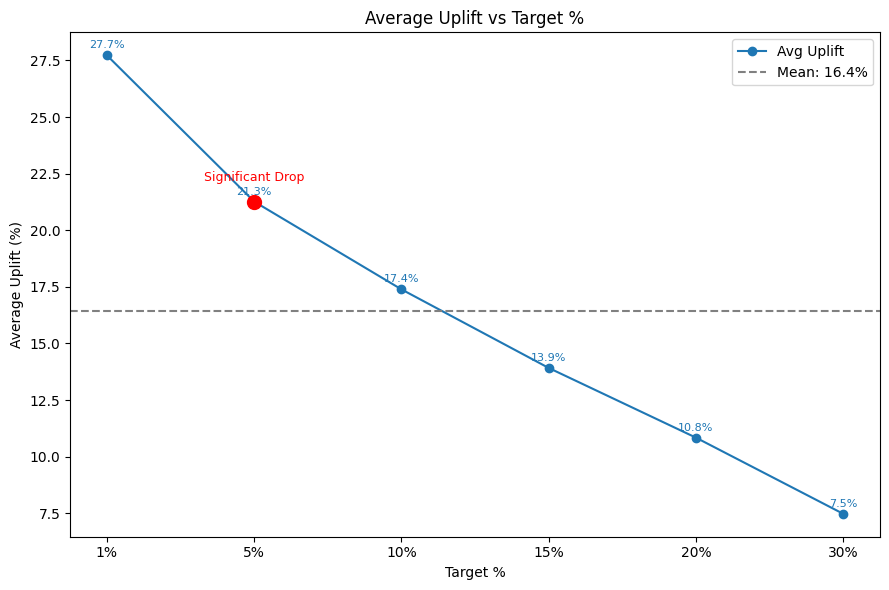

In [10]:
# Main Dashboard with Tabs
def customer_revenue_uplift_dashboard():
    with gr.Blocks(title="Customer Revenue Uplift Dashboard") as demo:
        gr.Markdown("# 🚀 Customer Revenue Uplift Dashboard")
        with gr.Tabs():
            with gr.TabItem("Ranking & Targeting"):
                tab1()
            with gr.TabItem("Campaign Simulation & What-If"):
                tab2()
            with gr.TabItem("Customer Segmentation"):
                tab3()
            with gr.TabItem("Network Influence Analysis"):
                tab4()
            with gr.TabItem("Model Explainability"):
                tab5()
    return demo

# Launch the dashboard
dashboard = customer_revenue_uplift_dashboard()
dashboard.launch()

## 🎉 Project Summary & Business Impact

### 🚀 **AI-Powered Customer Revenue Uplift Simulator - COMPLETE!**

We've successfully built an **advanced AI system** that goes far beyond traditional marketing analytics: